In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import transbigdata as tbd

from sklearn.model_selection import train_test_split, KFold,cross_validate,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt

final_data = gpd.read_file('final_land_data.shp')

print('length of total land hexagons = %d' % len(final_data))
final_data.head()


length of total land hexagons = 7328


,hex_id,accessibil,area,entropy,Resi_lur,Comm_lur,Edu_lur,Recre_lur,Public_lur,Health_lur,...,Rd_Ter,Rd_Cyc,Rd_Pedes,T_Enable_L,T_Hinder_L,T_Other_LU,station_de,geometry_x,geometry_y,geometry
0,891f25ad0dbffff,119,0.081623,0.000423,0.000010,0.000010,0.000010,1.000010,0.000010,0.000010,...,0.030864,0.000000,9.195498,0.000010,0.000010,0.000010,0.000000,12.183032,57.743808,"POLYGON ((12.18021 57.74436, 12.18286 57.74529..."
1,891f253aa8bffff,0,0.082003,0.303958,0.808345,0.000010,0.000010,0.000010,0.000010,0.000010,...,8.078311,0.000000,2.334086,0.000010,0.000010,0.000010,0.000000,12.082045,57.565686,"POLYGON ((12.07923 57.56624, 12.08188 57.56718..."
2,891f2506a8bffff,38454,0.081708,0.822373,0.309163,0.304195,0.000010,0.000010,0.000010,0.276717,...,22.194071,9.579723,14.658543,0.159733,0.275814,0.564483,0.000000,11.935684,57.665798,"POLYGON ((11.93287 57.66635, 11.93551 57.66729..."
3,891f2532257ffff,165,0.081726,0.000423,0.000010,0.000010,0.000010,1.000010,0.000010,0.000010,...,3.009512,2.845747,6.350286,0.000010,0.000010,0.000010,0.000000,12.104047,57.686618,"POLYGON ((12.10123 57.68717, 12.10388 57.68811..."
4,891f25a9d6bffff,51096,0.081618,0.932436,0.040814,0.133837,0.069977,0.507907,0.156894,0.048705,...,22.357815,4.128998,17.361245,0.430804,0.000010,0.569216,36.756666,12.050227,57.723355,"POLYGON ((12.04741 57.72391, 12.05006 57.72484..."


In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc


rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
plt.rcParams.update({'font.size': 20})

# plt.rcParams.update({
#     'text.usetex': True,
#     'text.latex.preamble': r'\usepackage{eulervm}',
#     'font.family': 'serif',
#     'font.serif': 'Palatino',
#     'font.size': 14,
# })

In [3]:
final_data.columns

Index(['hex_id', 'accessibil', 'area', 'entropy', 'Resi_lur', 'Comm_lur',
       'Edu_lur', 'Recre_lur', 'Public_lur', 'Health_lur', 'Other_lur',
       'Rd_Pri', 'Rd_Sec', 'Rd_Ter', 'Rd_Cyc', 'Rd_Pedes', 'T_Enable_L',
       'T_Hinder_L', 'T_Other_LU', 'station_de', 'geometry_x', 'geometry_y',
       'geometry'],
      dtype='object')

In [5]:
final_data.rename(columns={'accessibil': 'accessibility', 'entropy':'Land use entropy',
                           'Resi_lur':'Residential land use ratio', 'Comm_lur':'Commercial land use ratio',
                           'Edu_lur':'Educational land use ratio', 'Recre_lur':'Recreational land use ratio',
                           'Public_lur':'Public land use ratio', 'Health_lur':'Health land use ratio',
                           'Other_lur': 'Other land use ratio', 'Rd_Pri': 'Primary road density', 
                           'Rd_Sec': 'Secondary road density', 'Rd_Ter': 'Tertiary road density', 
                           'Rd_Cyc': 'Cycleway road density', 'Rd_Pedes':'Pedestrian road density',
                                        'T_Enable_L':'Enabling infrastructure ratio',
                                       'T_Hinder_L': 'Hindering infrastructure ratio', 'T_Other_LU': 'Other infrastructure ratio',
                                       'station_de': 'Station density'}, inplace=True)
final_data.head()

,hex_id,accessibility,area,Land use entropy,Residential land use ratio,Commercial land use ratio,Educational land use ratio,Recreational land use ratio,Public land use ratio,Health land use ratio,...,Tertiary road density,Cycleway road density,Pedestrian road density,Enabling infrastructure ratio,Hindering infrastructure ratio,Other infrastructure ratio,Station density,geometry_x,geometry_y,geometry
0,891f25ad0dbffff,119,0.081623,0.000423,0.000010,0.000010,0.000010,1.000010,0.000010,0.000010,...,0.030864,0.000000,9.195498,0.000010,0.000010,0.000010,0.000000,12.183032,57.743808,"POLYGON ((12.18021 57.74436, 12.18286 57.74529..."
1,891f253aa8bffff,0,0.082003,0.303958,0.808345,0.000010,0.000010,0.000010,0.000010,0.000010,...,8.078311,0.000000,2.334086,0.000010,0.000010,0.000010,0.000000,12.082045,57.565686,"POLYGON ((12.07923 57.56624, 12.08188 57.56718..."
2,891f2506a8bffff,38454,0.081708,0.822373,0.309163,0.304195,0.000010,0.000010,0.000010,0.276717,...,22.194071,9.579723,14.658543,0.159733,0.275814,0.564483,0.000000,11.935684,57.665798,"POLYGON ((11.93287 57.66635, 11.93551 57.66729..."
3,891f2532257ffff,165,0.081726,0.000423,0.000010,0.000010,0.000010,1.000010,0.000010,0.000010,...,3.009512,2.845747,6.350286,0.000010,0.000010,0.000010,0.000000,12.104047,57.686618,"POLYGON ((12.10123 57.68717, 12.10388 57.68811..."
4,891f25a9d6bffff,51096,0.081618,0.932436,0.040814,0.133837,0.069977,0.507907,0.156894,0.048705,...,22.357815,4.128998,17.361245,0.430804,0.000010,0.569216,36.756666,12.050227,57.723355,"POLYGON ((12.04741 57.72391, 12.05006 57.72484..."


In [25]:
# descriptive_statistics = final_data.describe()
# descriptive_statistics.to_csv('POI/descriptive.csv')

# VIF test

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


features_test = ['Land use entropy', 'Residential land use ratio', 'Commercial land use ratio',
                 'Educational land use ratio', 'Recreational land use ratio', 'Public land use ratio', 'Health land use ratio', 'Other land use ratio',
                 'Primary road density', 'Secondary road density', 'Tertiary road density', 'Cycleway road density', 'Pedestrian road density',
                 'Enabling infrastructure ratio', 'Hindering infrastructure ratio', 'Other infrastructure ratio', 'Station density']

col_test = final_data[features_test]

vif_data = pd.DataFrame()
vif_data["feature"] = col_test.columns
vif_data["VIF"] = [variance_inflation_factor(col_test.values.astype(float), i)
                          for i in range(len(col_test.columns))]

vif_data = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data.to_string(index=False, float_format='%.2f'))

                       feature  VIF
              Land use entropy 6.01
         Tertiary road density 3.99
 Enabling infrastructure ratio 2.32
         Cycleway road density 2.29
       Pedestrian road density 2.18
    Other infrastructure ratio 2.07
    Residential land use ratio 1.98
          Other land use ratio 1.65
               Station density 1.59
     Commercial land use ratio 1.54
   Recreational land use ratio 1.51
    Educational land use ratio 1.50
        Secondary road density 1.46
          Primary road density 1.42
Hindering infrastructure ratio 1.40
         Public land use ratio 1.31
         Health land use ratio 1.10


In [7]:
sorted_feature_names = vif_data[vif_data['VIF'] < 15]['feature']
print(len(sorted_feature_names))
sorted_feature_names=sorted_feature_names.tolist()
sorted_feature_names

17


['Land use entropy',
 'Tertiary road density',
 'Enabling infrastructure ratio',
 'Cycleway road density',
 'Pedestrian road density',
 'Other infrastructure ratio',
 'Residential land use ratio',
 'Other land use ratio',
 'Station density',
 'Commercial land use ratio',
 'Recreational land use ratio',
 'Educational land use ratio',
 'Secondary road density',
 'Primary road density',
 'Hindering infrastructure ratio',
 'Public land use ratio',
 'Health land use ratio']

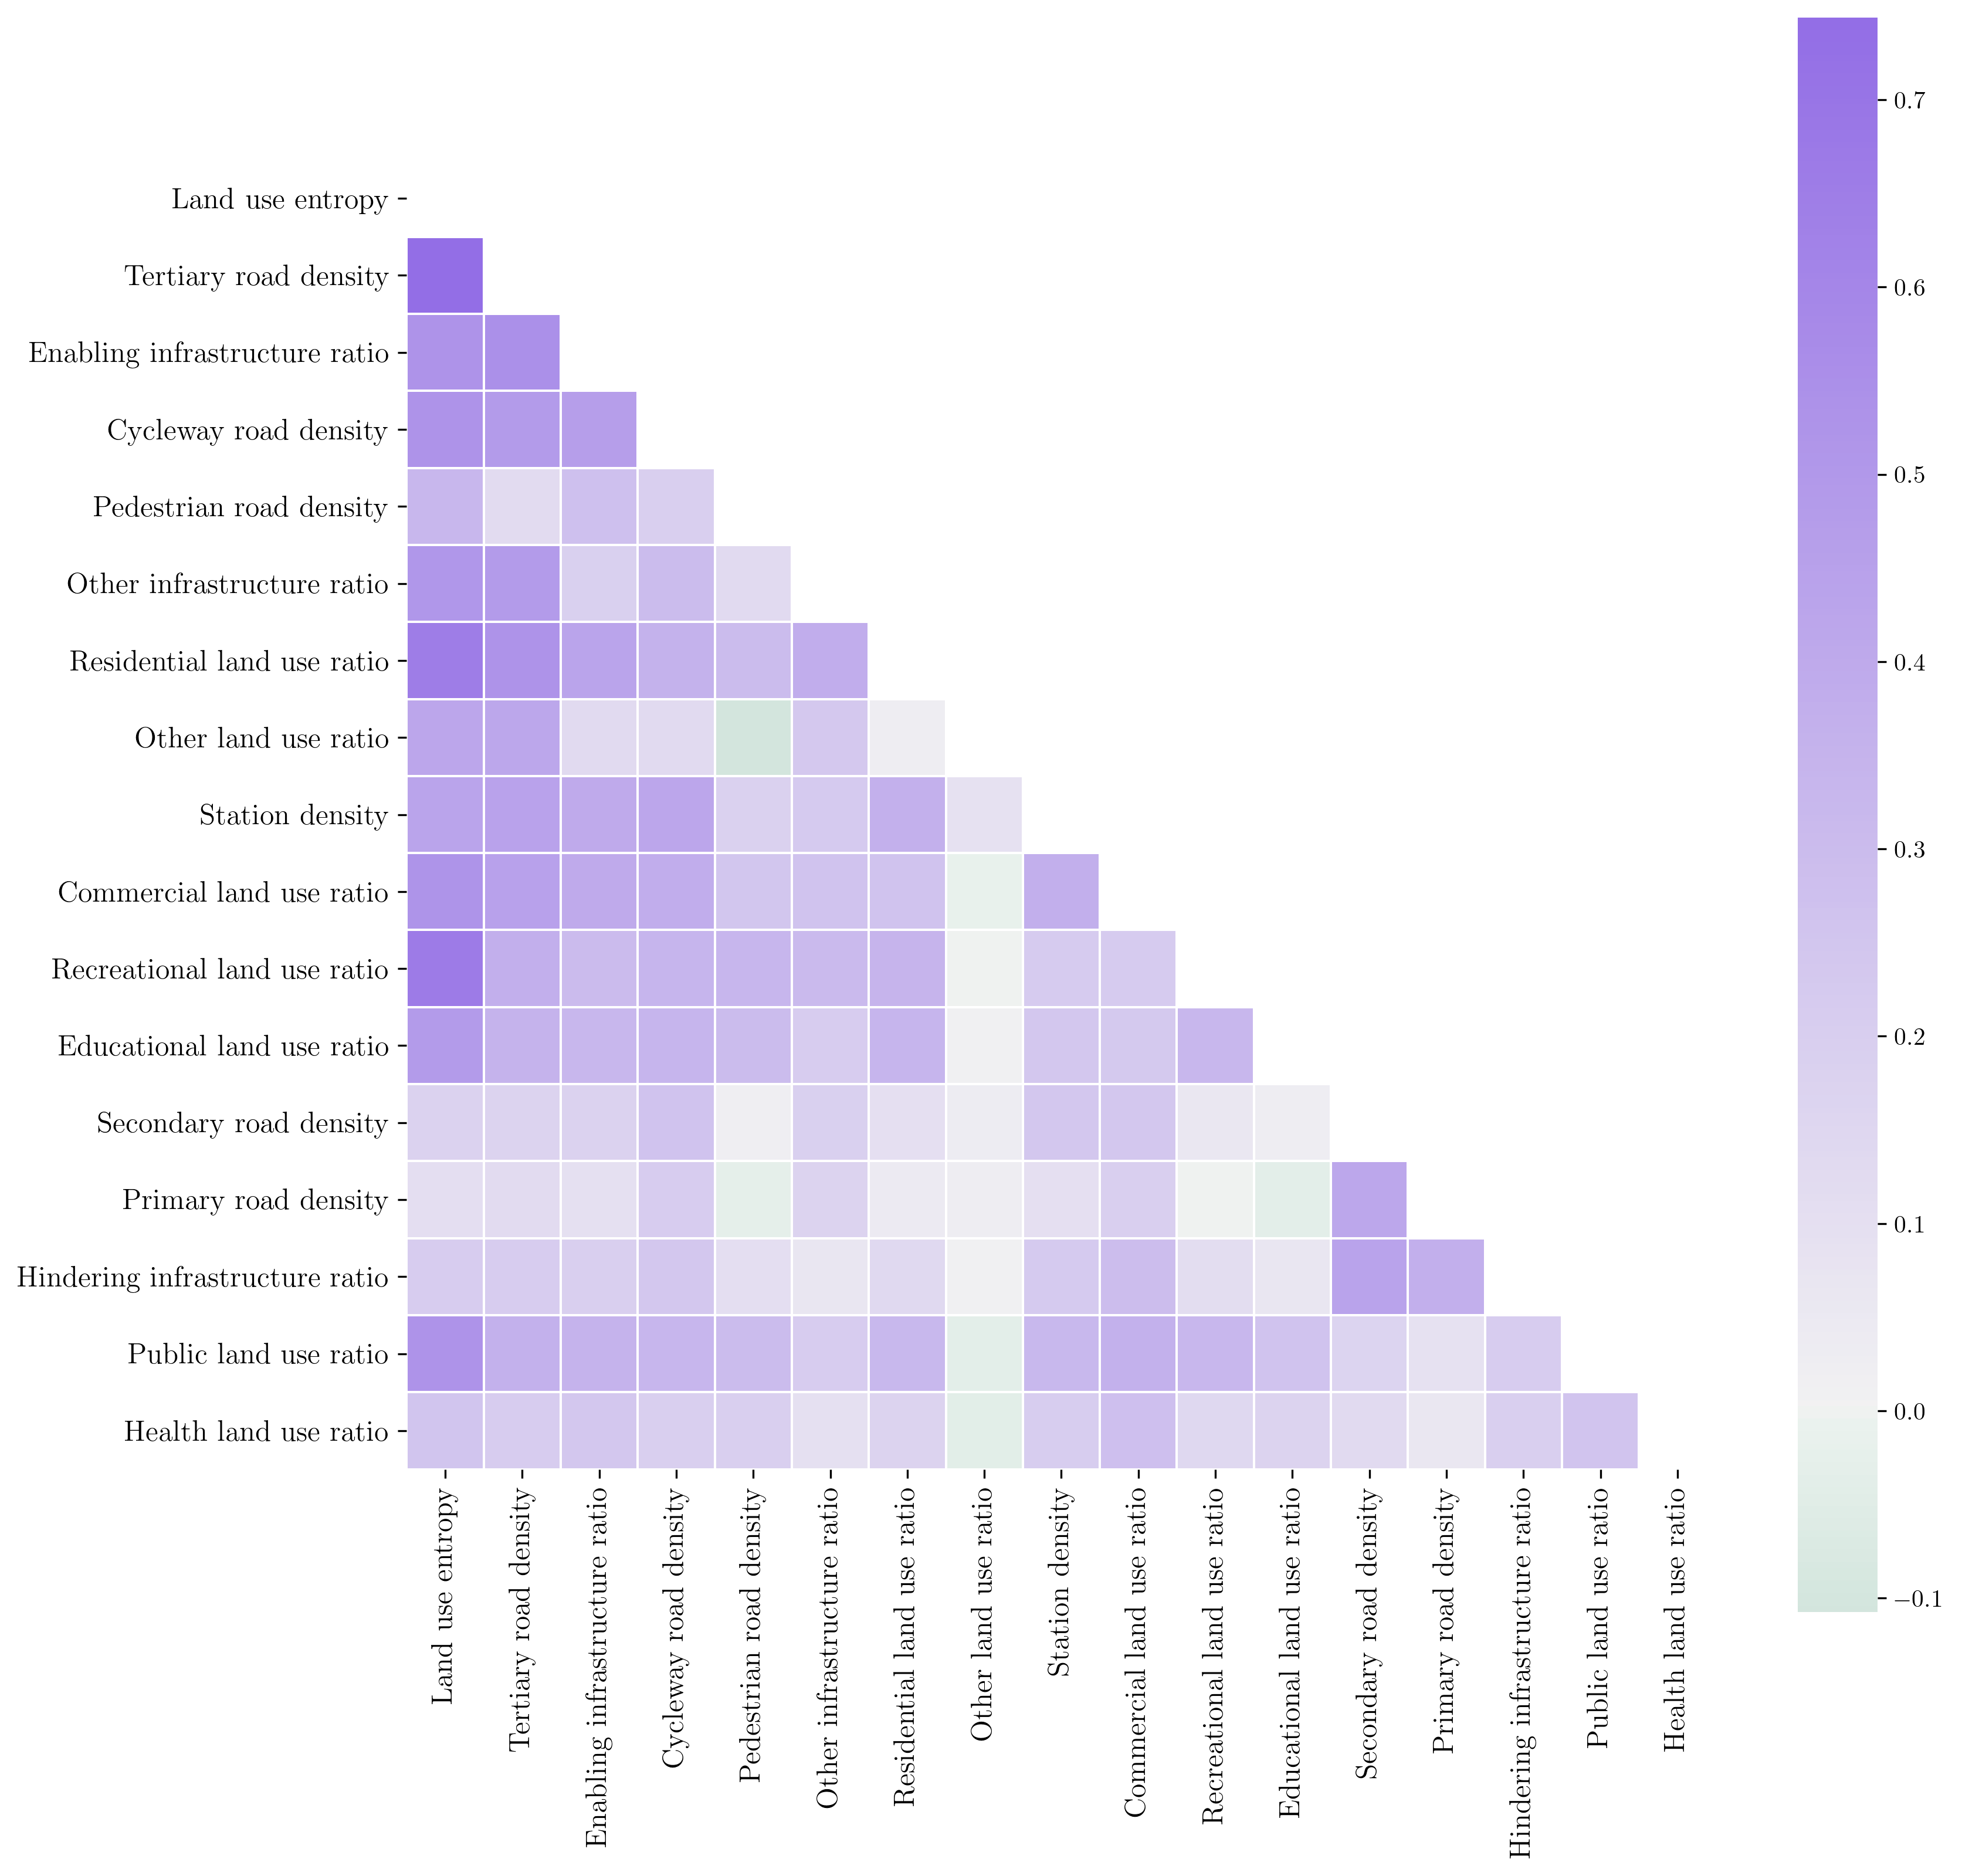

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


features = sorted_feature_names
corr = final_data[features].corr('spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(12, 12), dpi=300)
cmap = sns.diverging_palette(150, 275, s=80, l=55, n=9, as_cmap=True)
g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True,linewidths=.5, cbar_kws={"shrink": 1})
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 12)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 12)
plt.show()

In [9]:
features

['Land use entropy',
 'Tertiary road density',
 'Enabling infrastructure ratio',
 'Cycleway road density',
 'Pedestrian road density',
 'Other infrastructure ratio',
 'Residential land use ratio',
 'Other land use ratio',
 'Station density',
 'Commercial land use ratio',
 'Recreational land use ratio',
 'Educational land use ratio',
 'Secondary road density',
 'Primary road density',
 'Hindering infrastructure ratio',
 'Public land use ratio',
 'Health land use ratio']

# Random Forest

In [12]:
from sklearn.ensemble import RandomForestRegressor

independent_vars = features
dependent_var = 'accessibility'

X = final_data[independent_vars]
y = final_data[dependent_var]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [52]:
model_rf = RandomForestRegressor()

param_grid_simple = {
                     'n_estimators': [*range(50,500,50)],
                     'max_depth': [1,2,3,4,5,6]
                    }

cv = KFold(n_splits=5, shuffle=True, random_state=42)
search_rf = GridSearchCV(estimator=model_rf,
                     param_grid=param_grid_simple,
                     scoring = "r2",
                     verbose = True,
                     cv = cv,
                     n_jobs=-1)

search_rf.fit(x_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


/Users/huliyang/miniforge3/lib/python3.9/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450]},
             scoring='r2', verbose=True)

In [53]:
print(search_rf.best_estimator_)

RandomForestRegressor(max_depth=6, n_estimators=350)


In [57]:
model_rf = RandomForestRegressor()

param_grid_simple = {
                     'n_estimators':  [*range(50,500,50)],
                     'max_depth': [1,2,3,4,5,6],
                    'min_samples_split': [2, 5, 8], 
                    }

cv = KFold(n_splits=5, shuffle=True, random_state=42)
search_rf = GridSearchCV(estimator=model_rf,
                     param_grid=param_grid_simple,
                     scoring = "r2",
                     verbose = True,
                     cv = cv,
                     n_jobs=-1)

search_rf.fit(x_train, y_train)
print(search_rf.best_estimator_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


/Users/huliyang/miniforge3/lib/python3.9/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomForestRegressor(max_depth=6, min_samples_split=8, n_estimators=300)


In [58]:
model_rf = search_rf.best_estimator_

y_pred_train = model_rf.predict(x_train)
print("mean_absolute_error:", mean_absolute_error(y_train, y_pred_train))
print("mean_squared_error:", mean_squared_error(y_train, y_pred_train))
print("rmse:", sqrt(mean_squared_error(y_train, y_pred_train)))
print("r2 score:", r2_score(y_train, y_pred_train))
print('\n')

y_pred = model_rf.predict(x_test)
print("mean_absolute_error:", mean_absolute_error(y_test, y_pred))
print("mean_squared_error:", mean_squared_error(y_test, y_pred))
print("rmse:", sqrt(mean_squared_error(y_test, y_pred)))
print("r2 score:", r2_score(y_test, y_pred))
print('\n')

y_pred_whole = model_rf.predict(X)
print("mean_absolute_error:", mean_absolute_error(y, y_pred_whole))
print("mean_squared_error:", mean_squared_error(y, y_pred_whole))
print("rmse:", sqrt(mean_squared_error(y, y_pred_whole)))
print("r2 score:", r2_score(y, y_pred_whole))
print('\n')



mean_absolute_error: 5123.7998580315925
mean_squared_error: 90088007.86834022
rmse: 9491.470269054222
r2 score: 0.6606632296458872


mean_absolute_error: 5858.357365789345
mean_squared_error: 120353826.16307917
rmse: 10970.58914384634
r2 score: 0.5576596390361587


mean_absolute_error: 5344.227254259662
mean_squared_error: 99170231.45323801
rmse: 9958.425149251161
r2 score: 0.6292364964706115




# XGBOOST

In [101]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor()

param_grid_simple = {
                     'n_estimators': [*range(50,500,50)],
                     'max_depth': [1,2,3,4,5,6],
                    'learning_rate': [0.01, 0.05, 0.1, 0.2],  
                    'min_child_weight': [1, 5, 10],       
                    'subsample': [0.6, 0.8, 1.0],        
                    }

cv = KFold(n_splits=5, shuffle=True, random_state=42)
search_xgb = GridSearchCV(estimator=model_xgb,
                     param_grid=param_grid_simple,
                     scoring = "r2",
                     verbose = True,
                     cv = cv,
                     n_jobs=-1)

search_xgb.fit(x_train, y_train)

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inte...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'min_child_weight': [1, 5, 10],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='r2', verbose=True)

In [102]:
model_xgb = search_xgb.best_estimator_

y_pred_train = model_xgb.predict(x_train)
print("mean_absolute_error:", mean_absolute_error(y_train, y_pred_train))
print("mean_squared_error:", mean_squared_error(y_train, y_pred_train))
print("rmse:", sqrt(mean_squared_error(y_train, y_pred_train)))
print("r2 score:", r2_score(y_train, y_pred_train))
print('\n')

y_pred = model_xgb.predict(x_test)
print("mean_absolute_error:", mean_absolute_error(y_test, y_pred))
print("mean_squared_error:", mean_squared_error(y_test, y_pred))
print("rmse:", sqrt(mean_squared_error(y_test, y_pred)))
print("r2 score:", r2_score(y_test, y_pred))
print('\n')

y_pred_whole = model_xgb.predict(X)
print("mean_absolute_error:", mean_absolute_error(y, y_pred_whole))
print("mean_squared_error:", mean_squared_error(y, y_pred_whole))
print("rmse:", sqrt(mean_squared_error(y, y_pred_whole)))
print("r2 score:", r2_score(y, y_pred_whole))
print('\n')




mean_absolute_error: 5033.978288766166
mean_squared_error: 91229811.80776706
rmse: 9551.429830541972
r2 score: 0.6563623547554016


mean_absolute_error: 5672.448196747673
mean_squared_error: 115252387.34422895
rmse: 10735.566465921998
r2 score: 0.576409101486206


mean_absolute_error: 5225.571537626883
mean_squared_error: 98438551.3826415
rmse: 9921.62040105554
r2 score: 0.6319720149040222




In [116]:
from joblib import dump

dump(model_xgb, 'XGBoost_model.joblib')

['XGBoost_model.joblib']

In [10]:
from joblib import load

model_xgb = load('XGBoost_model.joblib')

# Adaboost

In [95]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

estimator = DecisionTreeRegressor(random_state=42)

model_ada = AdaBoostRegressor(estimator=estimator, random_state=42)

param_grid = {
    'n_estimators': [*range(50,500,50)], 
    'learning_rate': [0.01, 0.1, 0.5, 1],  
    'estimator__max_depth': [1,2,3,4,5,6]
}


cv = KFold(n_splits=5, shuffle=True, random_state=42)

search_ada = GridSearchCV(estimator=model_ada,
                           param_grid=param_grid,
                           cv=cv,
                           scoring='r2',
                           n_jobs=-1)              


search_ada.fit(x_train, y_train)


/Users/huliyang/miniforge3/lib/python3.9/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=42),
                                         random_state=42),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [1, 2, 3, 4, 5, 6],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400,
                                          450]},
             scoring='r2')

In [96]:
model_ada = search_ada.best_estimator_

y_pred_train = model_ada.predict(x_train)
print("mean_absolute_error:", mean_absolute_error(y_train, y_pred_train))
print("mean_squared_error:", mean_squared_error(y_train, y_pred_train))
print("rmse:", sqrt(mean_squared_error(y_train, y_pred_train)))
print("r2 score:", r2_score(y_train, y_pred_train))
print('\n')


y_pred = model_ada.predict(x_test)
print("mean_absolute_error:", mean_absolute_error(y_test, y_pred))
print("mean_squared_error:", mean_squared_error(y_test, y_pred))
print("rmse:", sqrt(mean_squared_error(y_test, y_pred)))
print("r2 score:", r2_score(y_test, y_pred))
print('\n')

y_pred_whole = model_ada.predict(X)
print("mean_absolute_error:", mean_absolute_error(y, y_pred_whole))
print("mean_squared_error:", mean_squared_error(y, y_pred_whole))
print("rmse:", sqrt(mean_squared_error(y, y_pred_whole)))
print("r2 score:", r2_score(y, y_pred_whole))
print('\n')



mean_absolute_error: 5451.210566910791
mean_squared_error: 86465249.49931759
rmse: 9298.669232708387
r2 score: 0.6743091649241331


mean_absolute_error: 6253.332218918549
mean_squared_error: 121760440.2192226
rmse: 11034.511326706888
r2 score: 0.552489864304708


mean_absolute_error: 5691.912738412574
mean_squared_error: 97056696.60535894
rmse: 9851.735715363002
r2 score: 0.6371382788255373




# Interpretation

## Feature importance

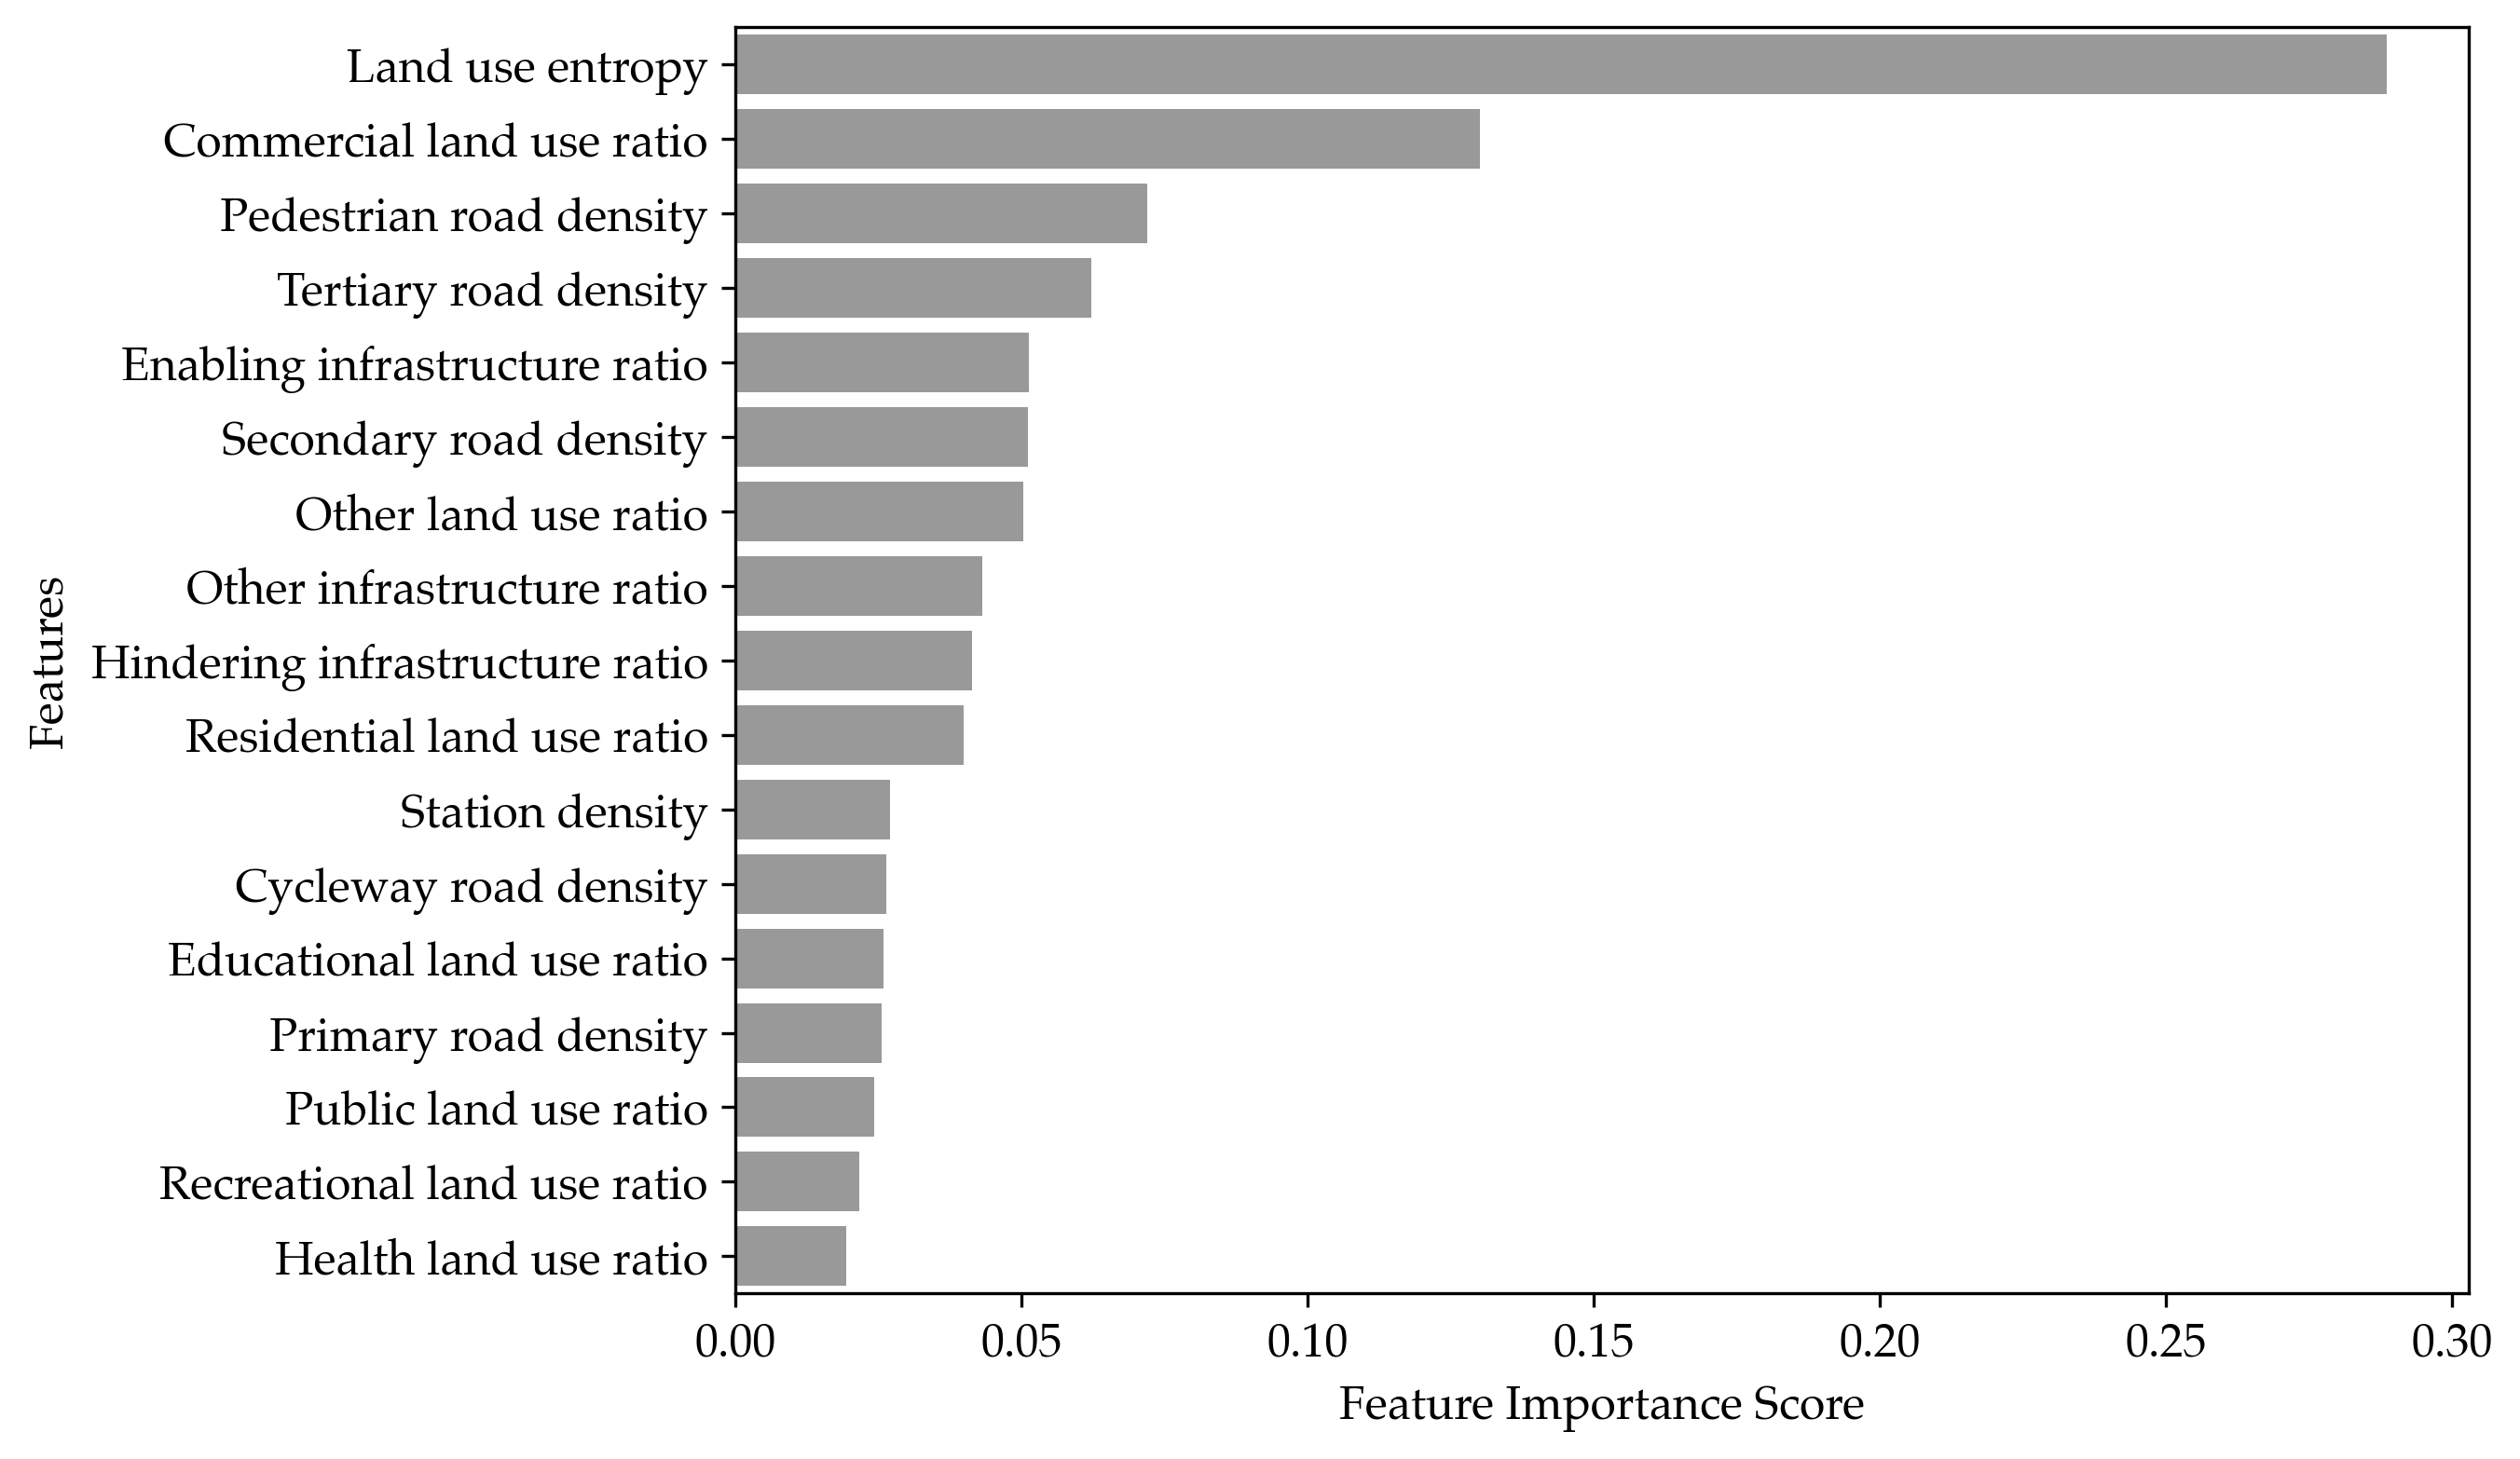

In [13]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

plt.rcParams.update({
    'text.usetex': False,
    'text.latex.preamble': r'\usepackage{eulervm}',
    'font.family': 'serif',
    'font.serif': 'Palatino',
    'font.size': 12,
})


# Get feature importances and plot them
model = model_xgb

result1 = pd.DataFrame({"features":independent_vars, "importances":model.feature_importances_})
result = result1.sort_values(by='importances',ascending=False)
plt.figure(figsize=(8,6), dpi=300)
sns.barplot(x=result['importances'], y=result['features'], color='gray', alpha=0.8)
plt.xlabel('Feature Importance Score', fontsize='12')
plt.ylabel('Features', fontsize='12')
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
# plt.savefig('result_output/importance.pdf', bbox_inches='tight', dpi=300)
plt.show()

## Road design

PyALE._ALE_generic:INFO: Continuous feature detected.


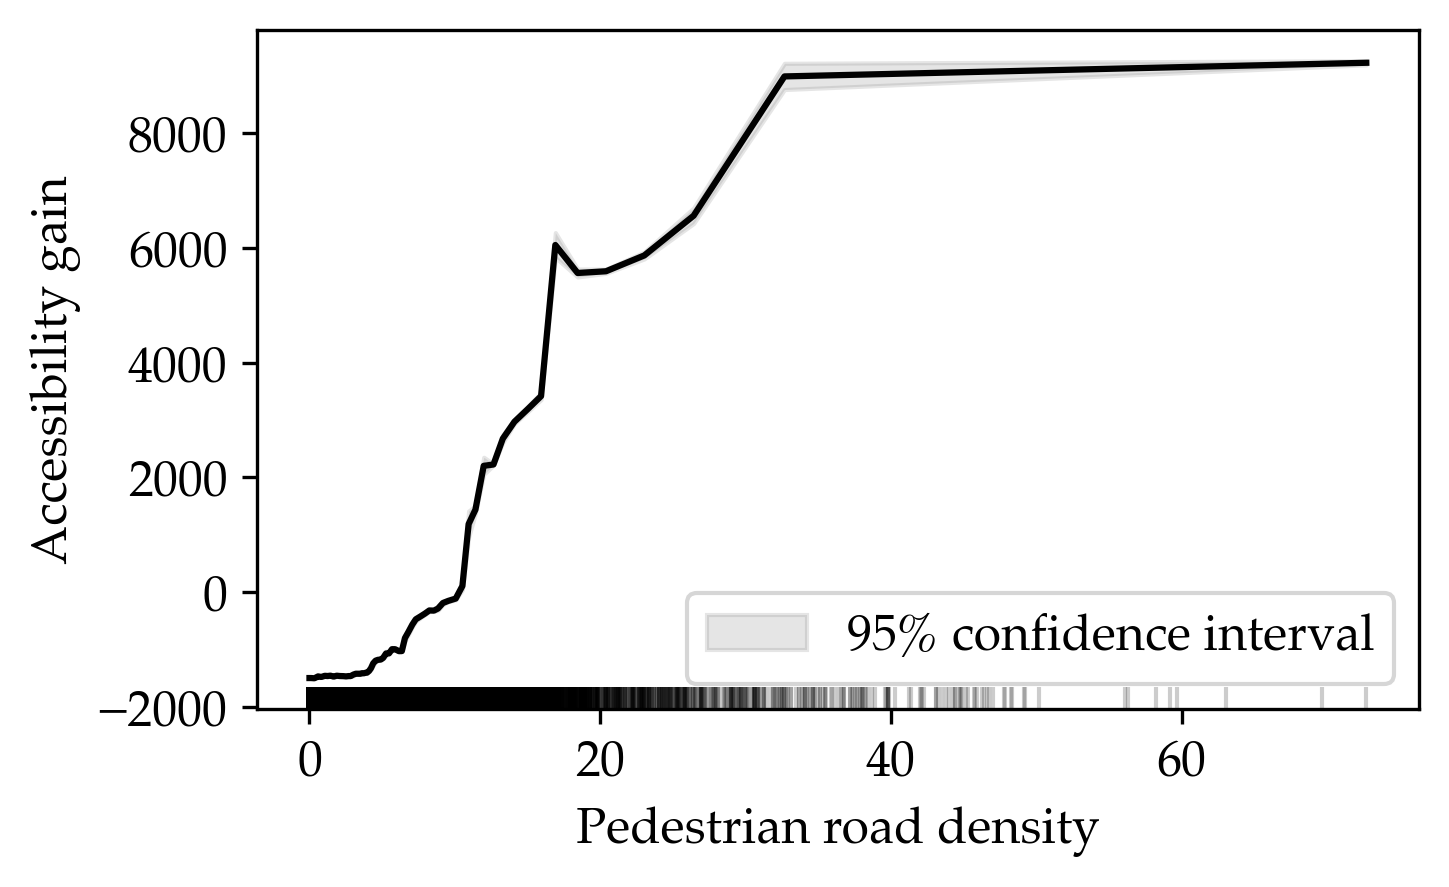

In [14]:
## 1D - continuous - with 95% CI
from PyALE import ale

X_sample = X[independent_vars].loc[X.index.to_list(), :]

fig, ax = plt.subplots(figsize=(5,3),dpi=300)
ale_eff = ale(
    X=X_sample, model=model, feature=["Pedestrian road density"], grid_size=70, include_CI=True, C=0.95, fig=fig, ax=ax
)
ax.set_xlabel('Pedestrian road density')
ax.set_ylabel('Accessibility gain')
# Customize line color
for line in ax.get_lines():
    line.set_color('black') 
    line.set_linewidth(1.5)
# plt.legend(['95\% condfidence interval'],fontsize=12)
ax.set_title('')
plt.savefig('result_output/Pedestrian.pdf', bbox_inches='tight', dpi=300)
plt.show()



PyALE._ALE_generic:INFO: Continuous feature detected.


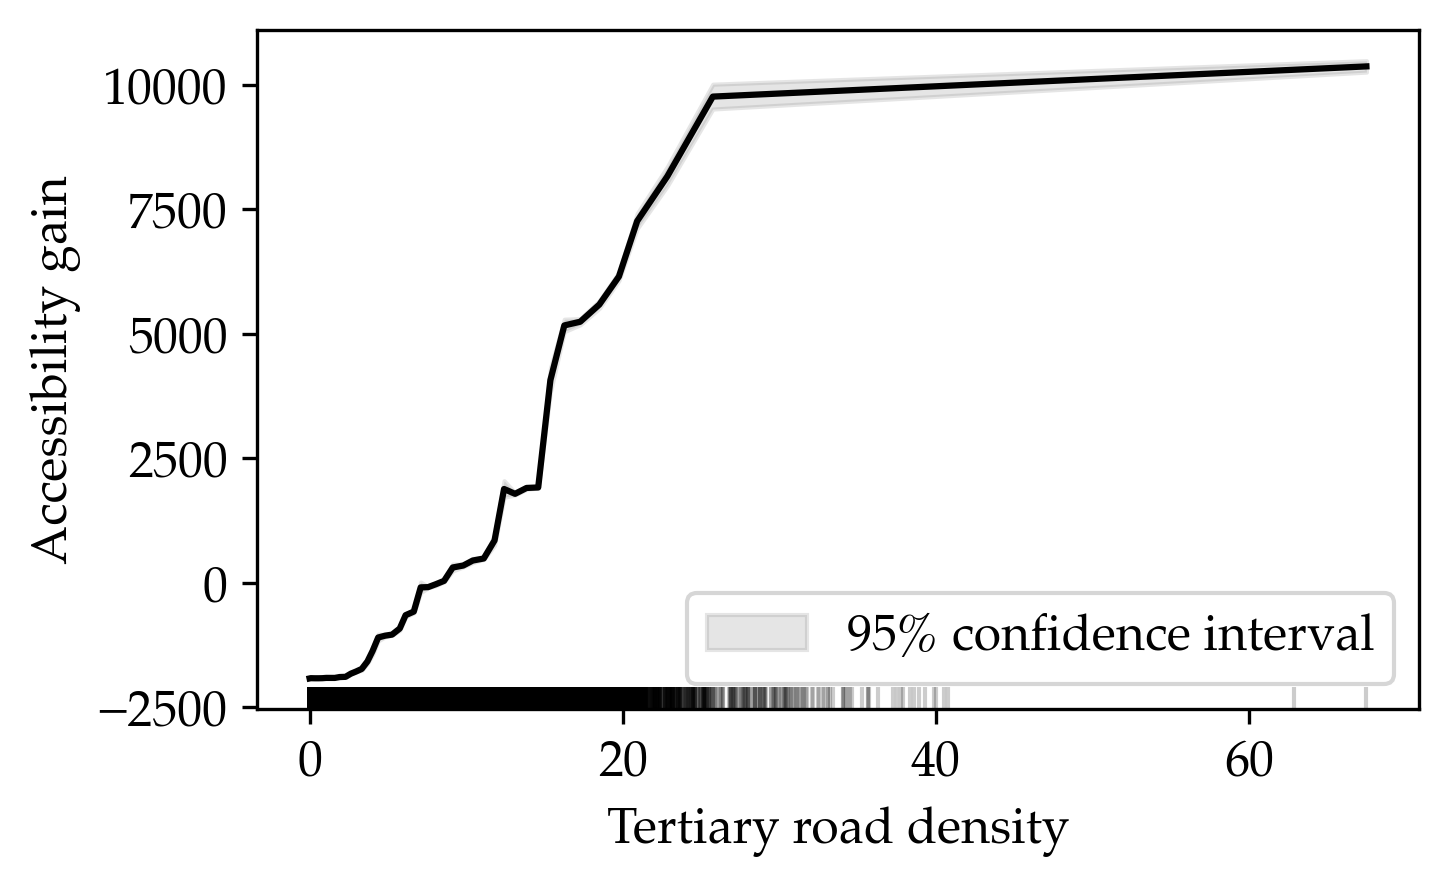

In [15]:
fig, ax = plt.subplots(figsize=(5,3),dpi=300)
ale_eff = ale(
    X=X_sample, model=model, feature=["Tertiary road density"], grid_size=60, include_CI=True, C=0.95, fig=fig, ax=ax
)
ax.set_xlabel('Tertiary road density')
ax.set_ylabel('Accessibility gain')
# Customize line color
for line in ax.get_lines():
    line.set_color('black') 
    line.set_linewidth(1.5)
# plt.legend(['95\% condfidence interval'],fontsize=12)
ax.set_title('')
plt.savefig('result_output/Tertiary.pdf', bbox_inches='tight', dpi=300)
plt.show()


PyALE._ALE_generic:INFO: Continuous feature detected.


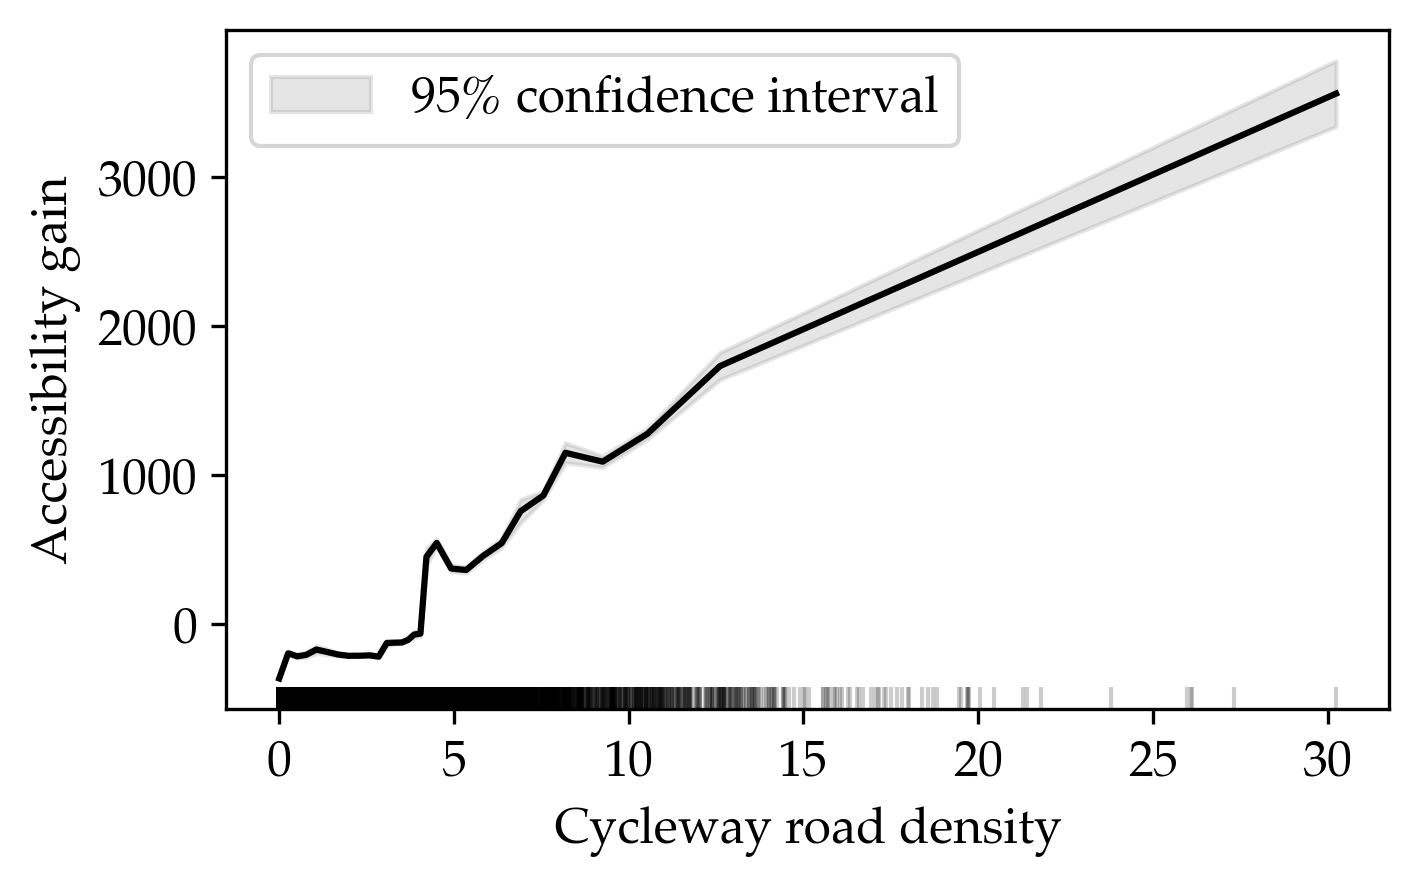

In [16]:
fig, ax = plt.subplots(figsize=(5,3),dpi=300)
ale_eff = ale(
    X=X_sample, model=model, feature=["Cycleway road density"], grid_size=60, include_CI=True, C=0.95, fig=fig, ax=ax
)
ax.set_xlabel('Cycleway road density')
ax.set_ylabel('Accessibility gain')
# Customize line color
for line in ax.get_lines():
    line.set_color('black') 
    line.set_linewidth(1.5)
# plt.legend(['95\% condfidence interval'],fontsize=12)
ax.set_title('')
plt.savefig('result_output/Cycleway.pdf', bbox_inches='tight', dpi=300)
plt.show()


PyALE._ALE_generic:INFO: Continuous feature detected.


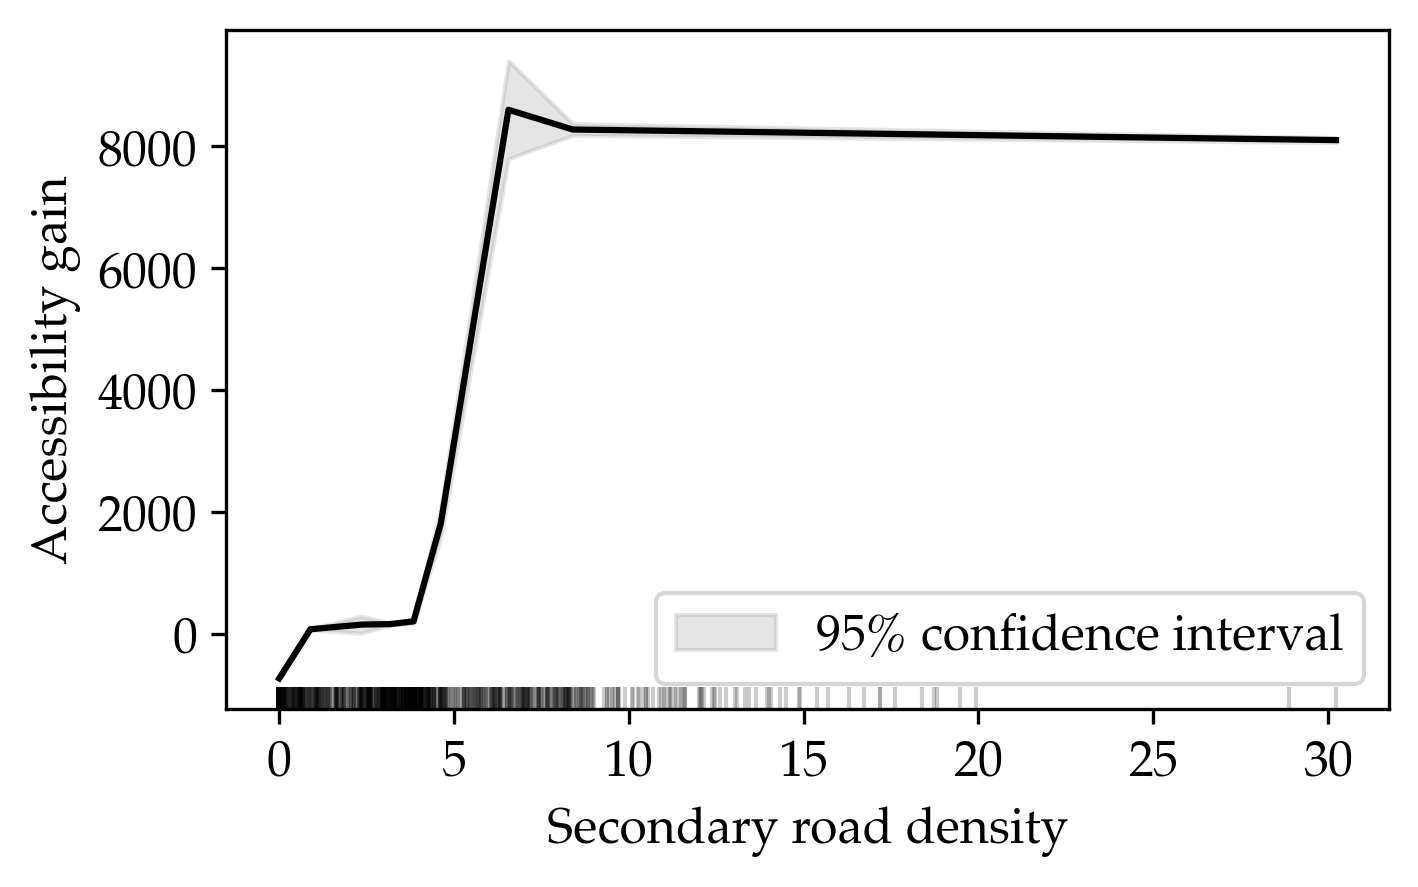

In [17]:
fig, ax = plt.subplots(figsize=(5,3),dpi=300)
ale_eff = ale(
    X=X_sample, model=model, feature=["Secondary road density"], grid_size=80, include_CI=True, C=0.95, fig=fig, ax=ax
)
ax.set_xlabel('Secondary road density')
ax.set_ylabel('Accessibility gain')
# Customize line color
for line in ax.get_lines():
    line.set_color('black') 
    line.set_linewidth(1.5)
# plt.legend(['95\% condfidence interval'],fontsize=12)
ax.set_title('')
plt.savefig('result_output/Secondary.pdf', bbox_inches='tight', dpi=300)

plt.show()


PyALE._ALE_generic:INFO: Continuous feature detected.


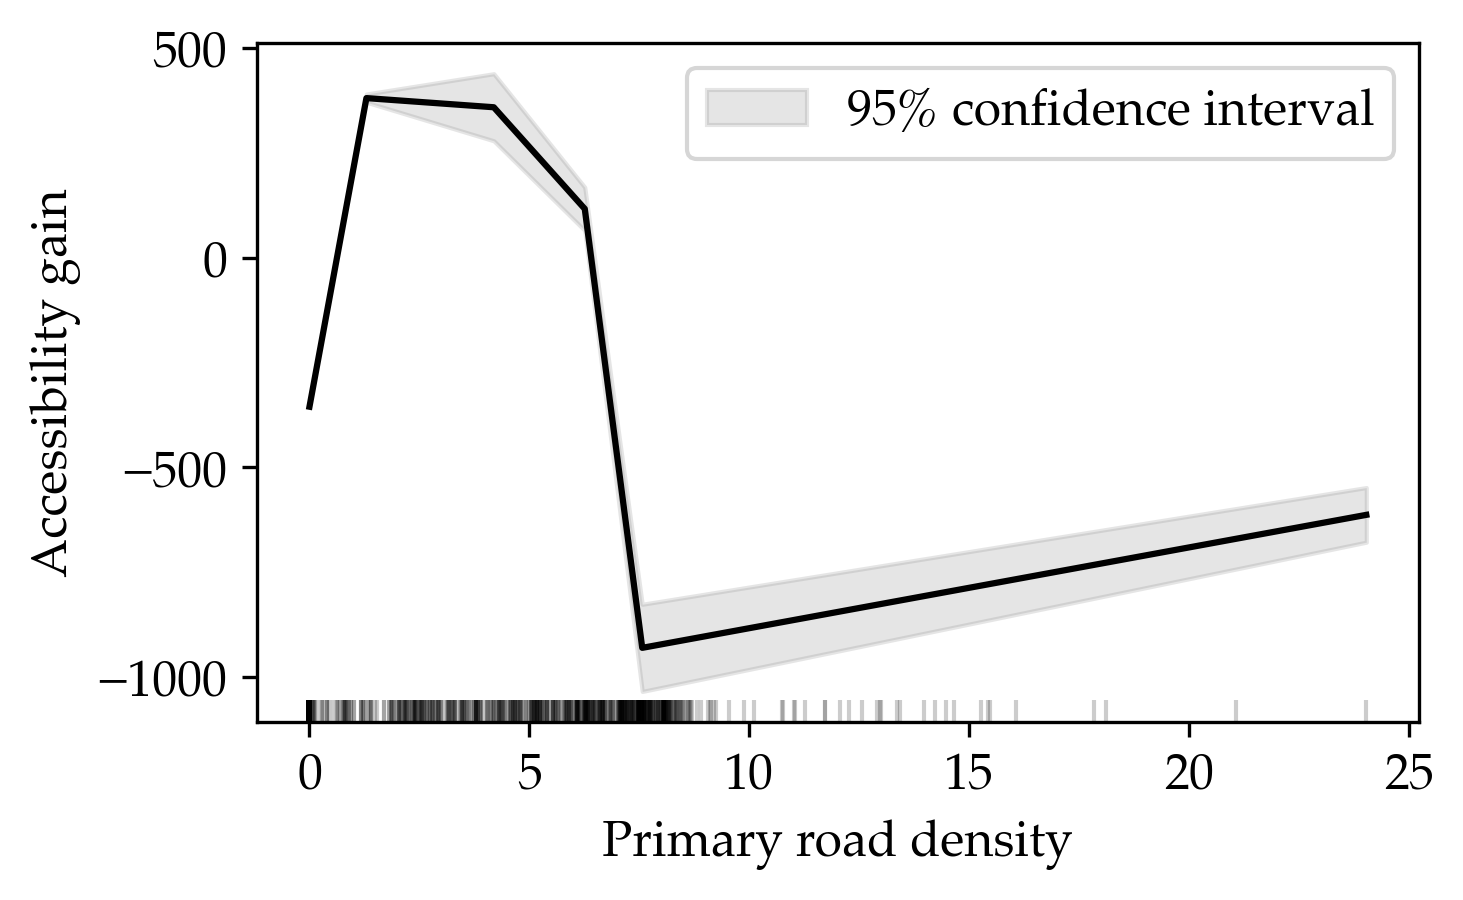

In [18]:
fig, ax = plt.subplots(figsize=(5,3),dpi=300)
ale_eff = ale(
    X=X_sample, model=model, feature=["Primary road density"], grid_size=50, include_CI=True, C=0.95, fig=fig, ax=ax
)
ax.set_xlabel('Primary road density')
ax.set_ylabel('Accessibility gain')
# Customize line color
for line in ax.get_lines():
    line.set_color('black') 
    line.set_linewidth(1.5)
# plt.legend(['95\% condfidence interval'],fontsize=12)
ax.set_title('')
plt.savefig('result_output/Primary.pdf', bbox_inches='tight', dpi=300)

plt.show()


## Land use POI

PyALE._ALE_generic:INFO: Continuous feature detected.


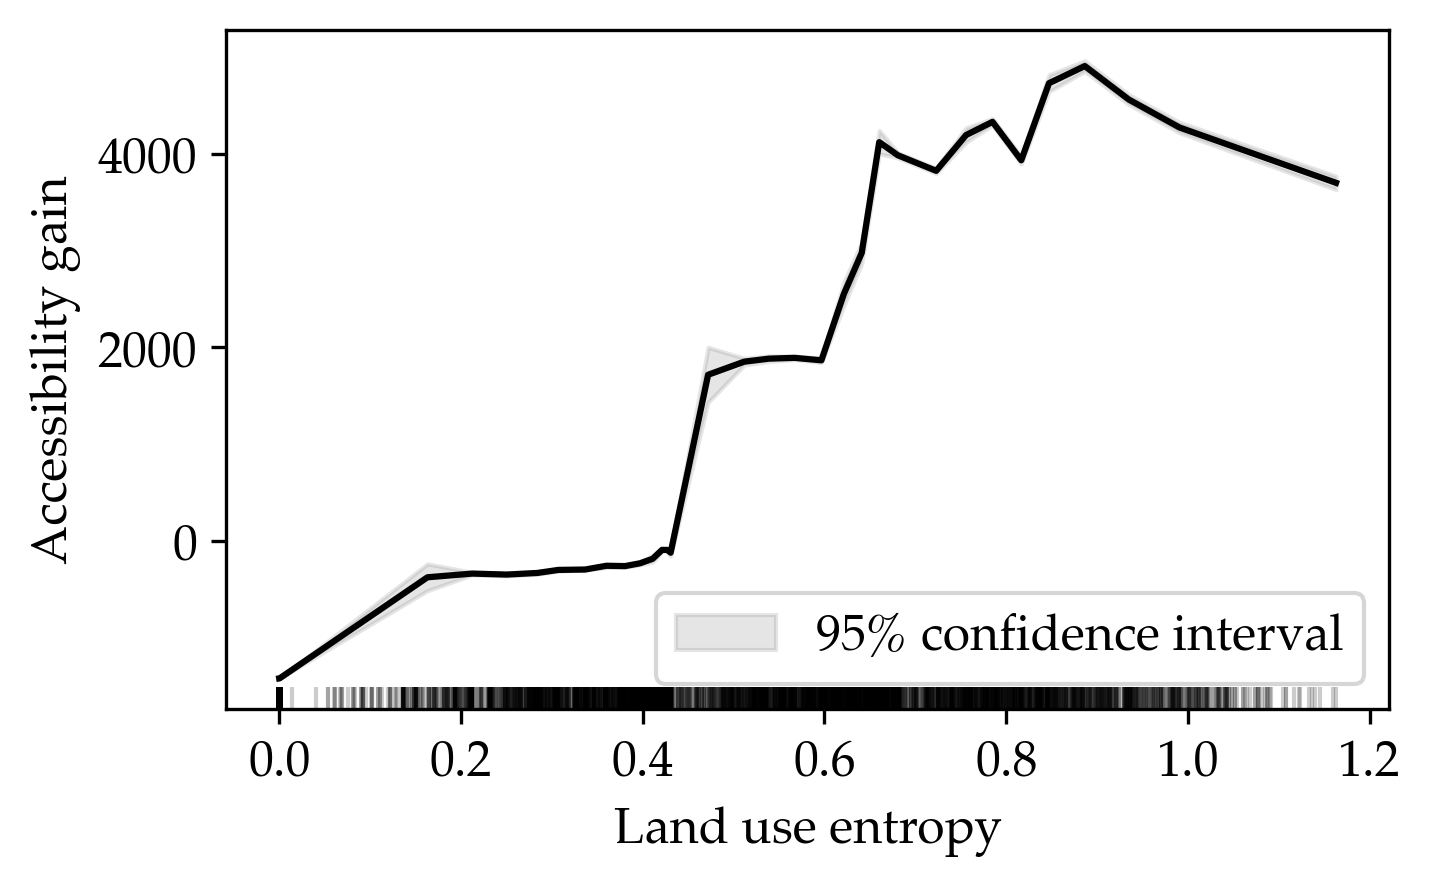

In [19]:
fig, ax = plt.subplots(figsize=(5,3),dpi=300)
ale_eff = ale(
    X=X_sample, model=model, feature=["Land use entropy"], grid_size=70, include_CI=True, C=0.95, fig=fig, ax=ax
)
ax.set_xlabel('Land use entropy')
ax.set_ylabel('Accessibility gain')
# Customize line color
for line in ax.get_lines():
    line.set_color('black') 
    line.set_linewidth(1.5)
# plt.legend(['95\% condfidence interval'],fontsize=12)
ax.set_title('')
plt.savefig('result_output/Entropy.pdf', bbox_inches='tight', dpi=300)

plt.show()

PyALE._ALE_generic:INFO: Continuous feature detected.


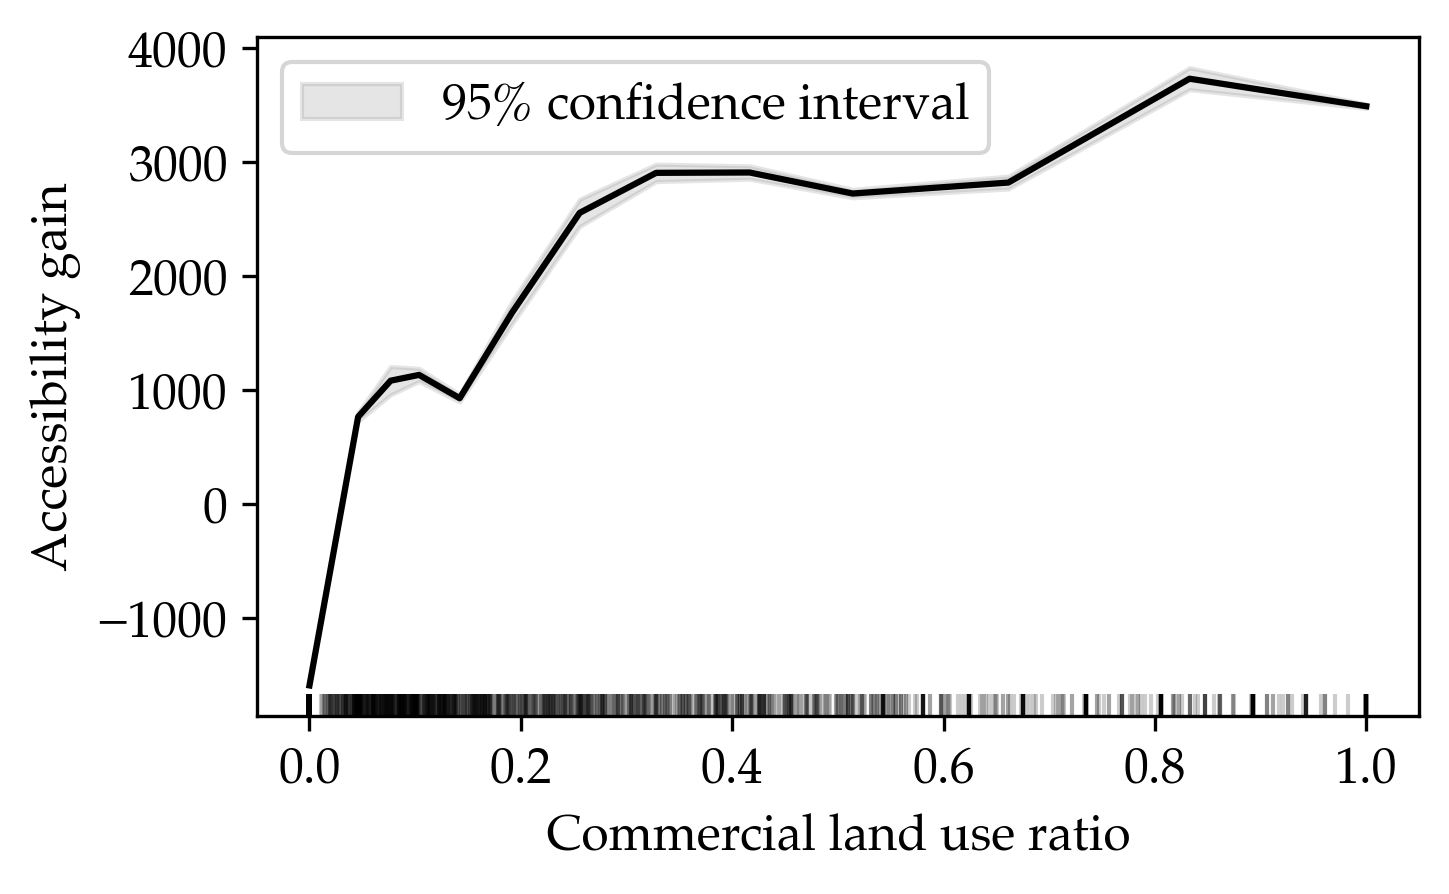

In [20]:
fig, ax = plt.subplots(figsize=(5,3),dpi=300)
ale_eff = ale(
    X=X_sample, model=model, feature=["Commercial land use ratio"], grid_size=70, include_CI=True, C=0.95, fig=fig, ax=ax
)
ax.set_xlabel('Commercial land use ratio')
ax.set_ylabel('Accessibility gain')
# Customize line color
for line in ax.get_lines():
    line.set_color('black') 
    line.set_linewidth(1.5)
# plt.legend(['95\% condfidence interval'],fontsize=12)
ax.set_title('')
plt.savefig('result_output/Commercial.pdf', bbox_inches='tight', dpi=300)

plt.show()


PyALE._ALE_generic:INFO: Continuous feature detected.


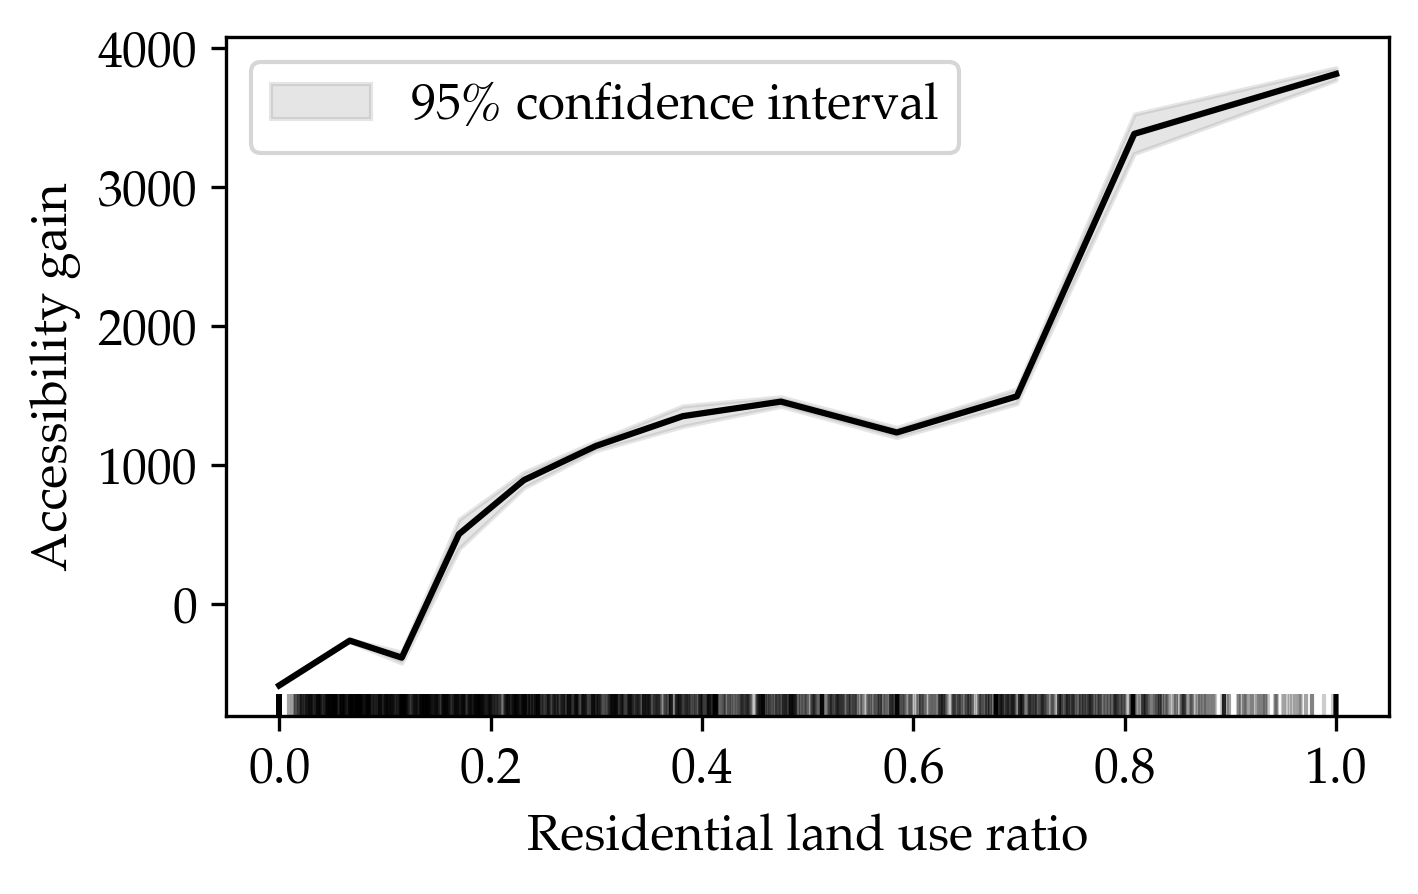

In [21]:
fig, ax = plt.subplots(figsize=(5,3),dpi=300)
ale_eff = ale(
    X=X_sample, model=model, feature=["Residential land use ratio"], grid_size=40, include_CI=True, C=0.95, fig=fig, ax=ax
)
ax.set_xlabel('Residential land use ratio')
ax.set_ylabel('Accessibility gain')
# Customize line color
for line in ax.get_lines():
    line.set_color('black') 
    line.set_linewidth(1.5)
# plt.legend(['95\% condfidence interval'],fontsize=12)
ax.set_title('')
plt.savefig('result_output/Residential.pdf', bbox_inches='tight', dpi=300)

plt.show()


PyALE._ALE_generic:INFO: Continuous feature detected.


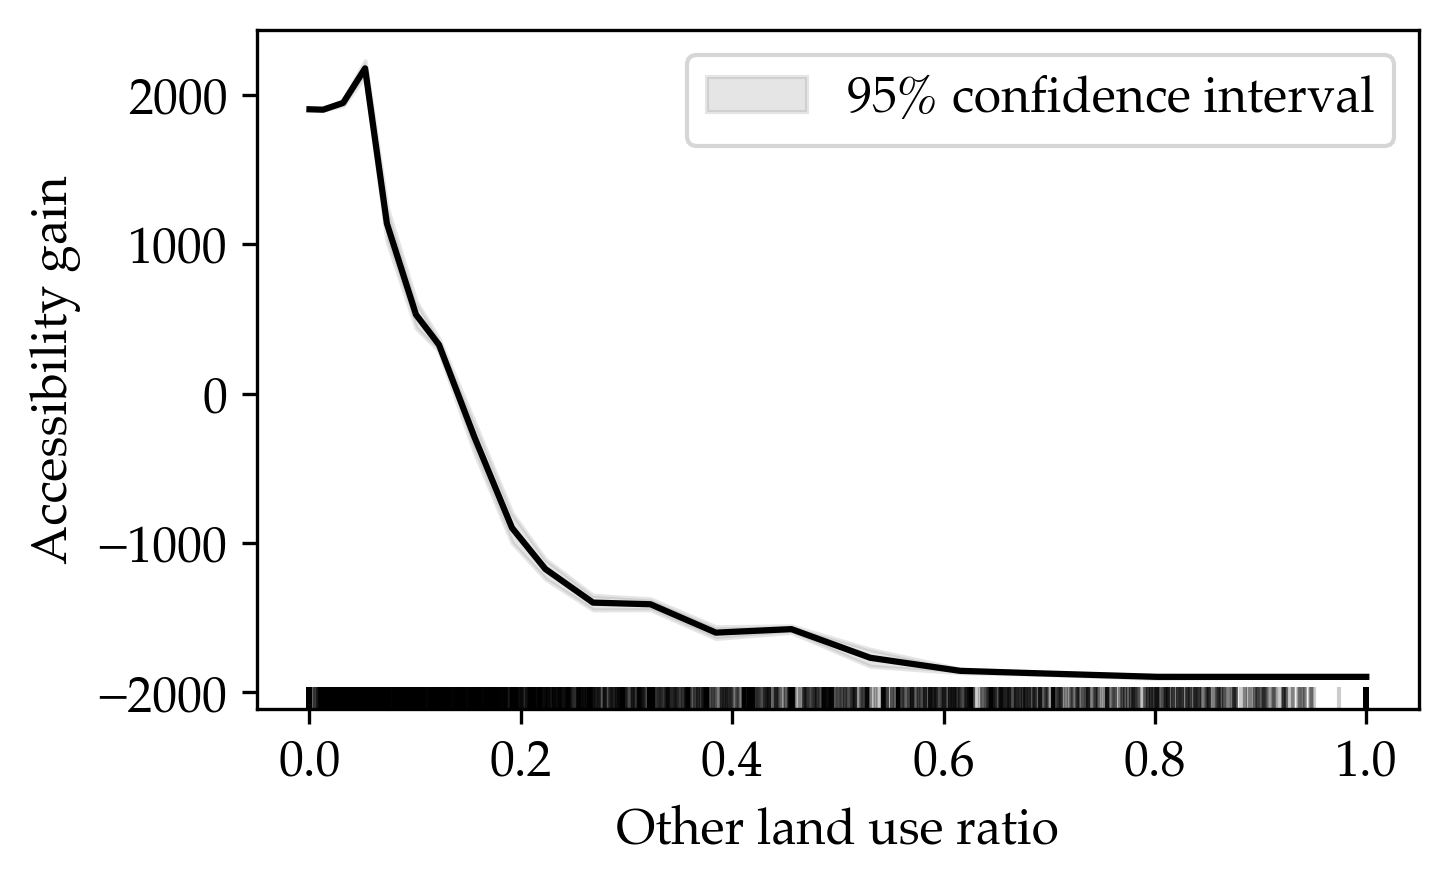

In [22]:
fig, ax = plt.subplots(figsize=(5,3),dpi=300)
ale_eff = ale(
    X=X_sample, model=model, feature=["Other land use ratio"], grid_size=40, include_CI=True, C=0.95, fig=fig, ax=ax
)
ax.set_xlabel('Other land use ratio')
ax.set_ylabel('Accessibility gain')
# Customize line color
for line in ax.get_lines():
    line.set_color('black') 
    line.set_linewidth(1.5)
# plt.legend(['95\% condfidence interval'],fontsize=12)
ax.set_title('')

plt.savefig('result_output/Other_land_use.pdf', bbox_inches='tight', dpi=300)

plt.show()


PyALE._ALE_generic:INFO: Continuous feature detected.


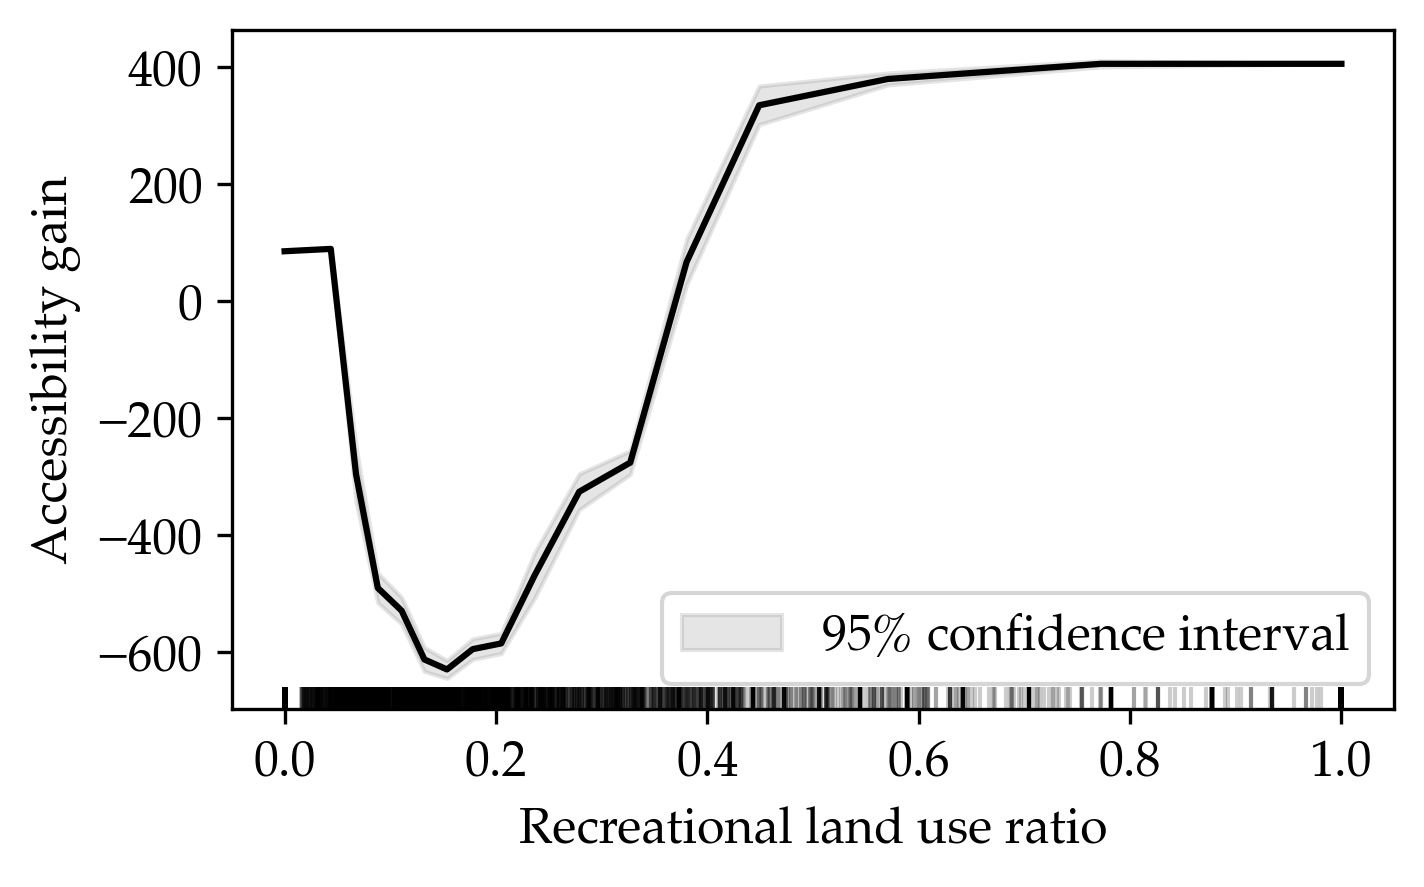

In [23]:
fig, ax = plt.subplots(figsize=(5,3),dpi=300)
ale_eff = ale(
    X=X_sample, model=model, feature=["Recreational land use ratio"], grid_size=50, include_CI=True, C=0.95, fig=fig, ax=ax
)
ax.set_xlabel('Recreational land use ratio')
ax.set_ylabel('Accessibility gain')
# Customize line color
for line in ax.get_lines():
    line.set_color('black') 
    line.set_linewidth(1.5)
# plt.legend(['95\% condfidence interval'],fontsize=12)
ax.set_title('')
plt.savefig('result_output/Recreational.pdf', bbox_inches='tight', dpi=300)

plt.show()


## Distance to transit

PyALE._ALE_generic:INFO: Continuous feature detected.


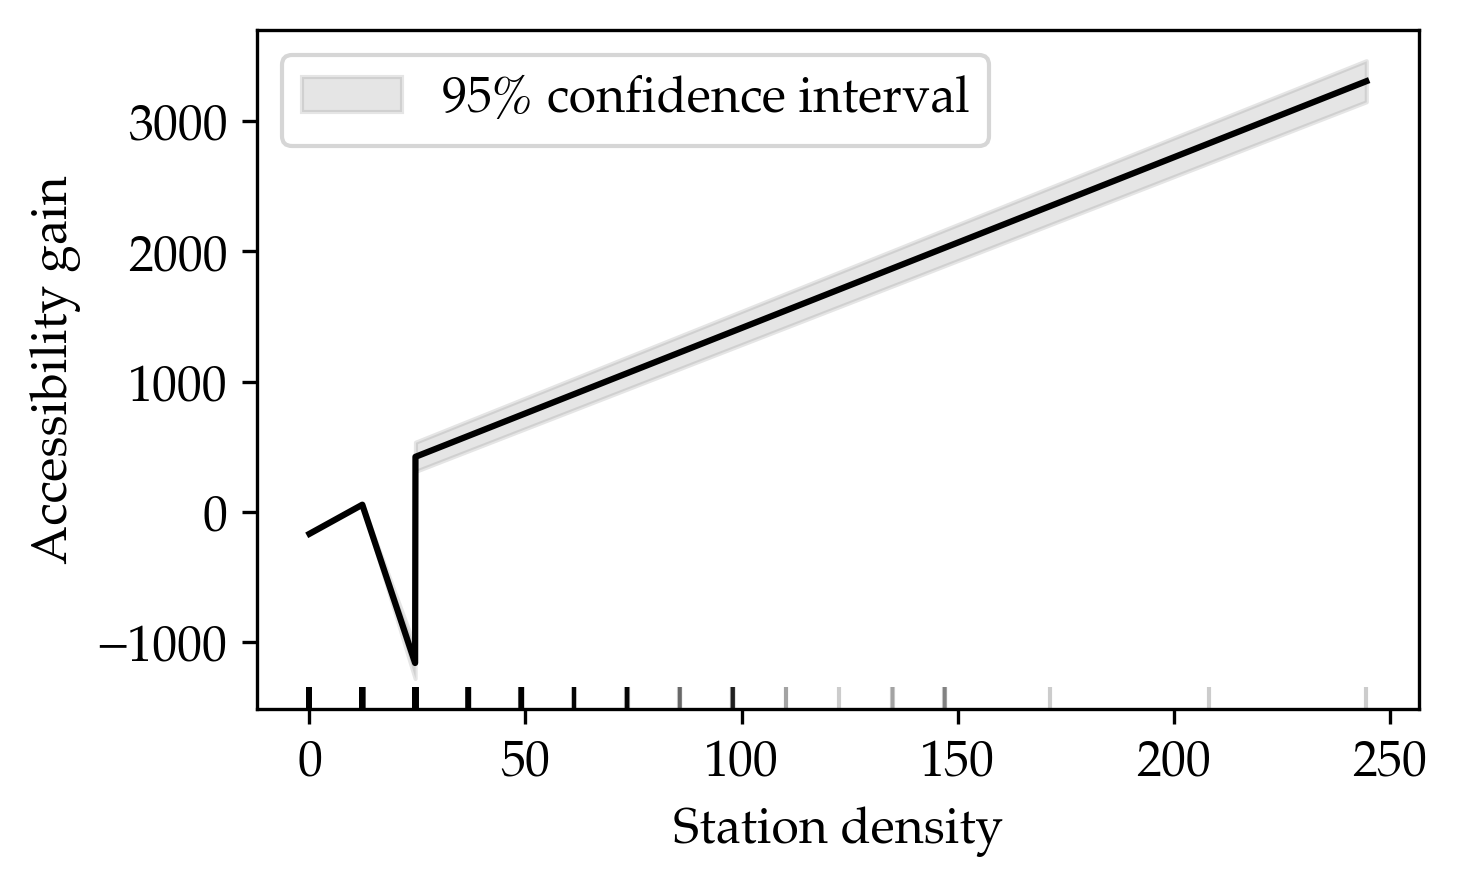

In [24]:
fig, ax = plt.subplots(figsize=(5,3),dpi=300)
ale_eff = ale(
    X=X_sample, model=model, feature=["Station density"], fig=fig, ax=ax
)
ax.set_xlabel('Station density')
ax.set_ylabel('Accessibility gain')
# Customize line color
for line in ax.get_lines():
    line.set_color('black') 
    line.set_linewidth(1.5)
# plt.legend(['95\% condfidence interval'],fontsize=12)
ax.set_title('')
plt.savefig('result_output/Station_density.pdf', bbox_inches='tight', dpi=300)

plt.show()


PyALE._ALE_generic:INFO: Continuous feature detected.


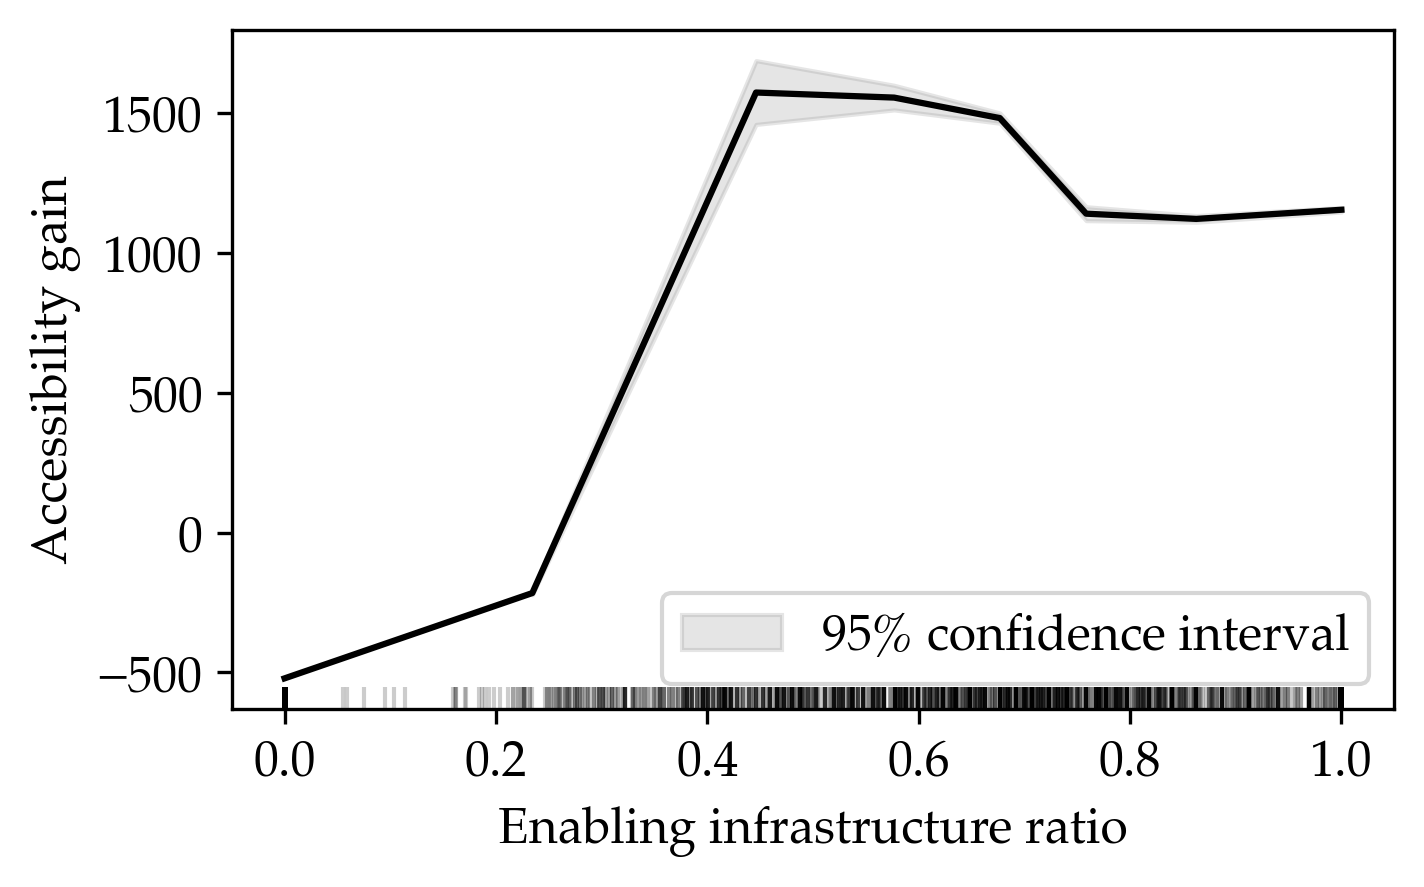

In [25]:
fig, ax = plt.subplots(figsize=(5,3),dpi=300)
ale_eff = ale(
    X=X_sample, model=model, feature=["Enabling infrastructure ratio"], grid_size=30, include_CI=True, C=0.95, fig=fig, ax=ax
)
ax.set_xlabel('Enabling infrastructure ratio')
ax.set_ylabel('Accessibility gain')
# Customize line color
for line in ax.get_lines():
    line.set_color('black') 
    line.set_linewidth(1.5)
# plt.legend(['95\% condfidence interval'],fontsize=12)
ax.set_title('')
plt.savefig('result_output/T_enabling.pdf', bbox_inches='tight', dpi=300)

plt.show()


PyALE._ALE_generic:INFO: Continuous feature detected.


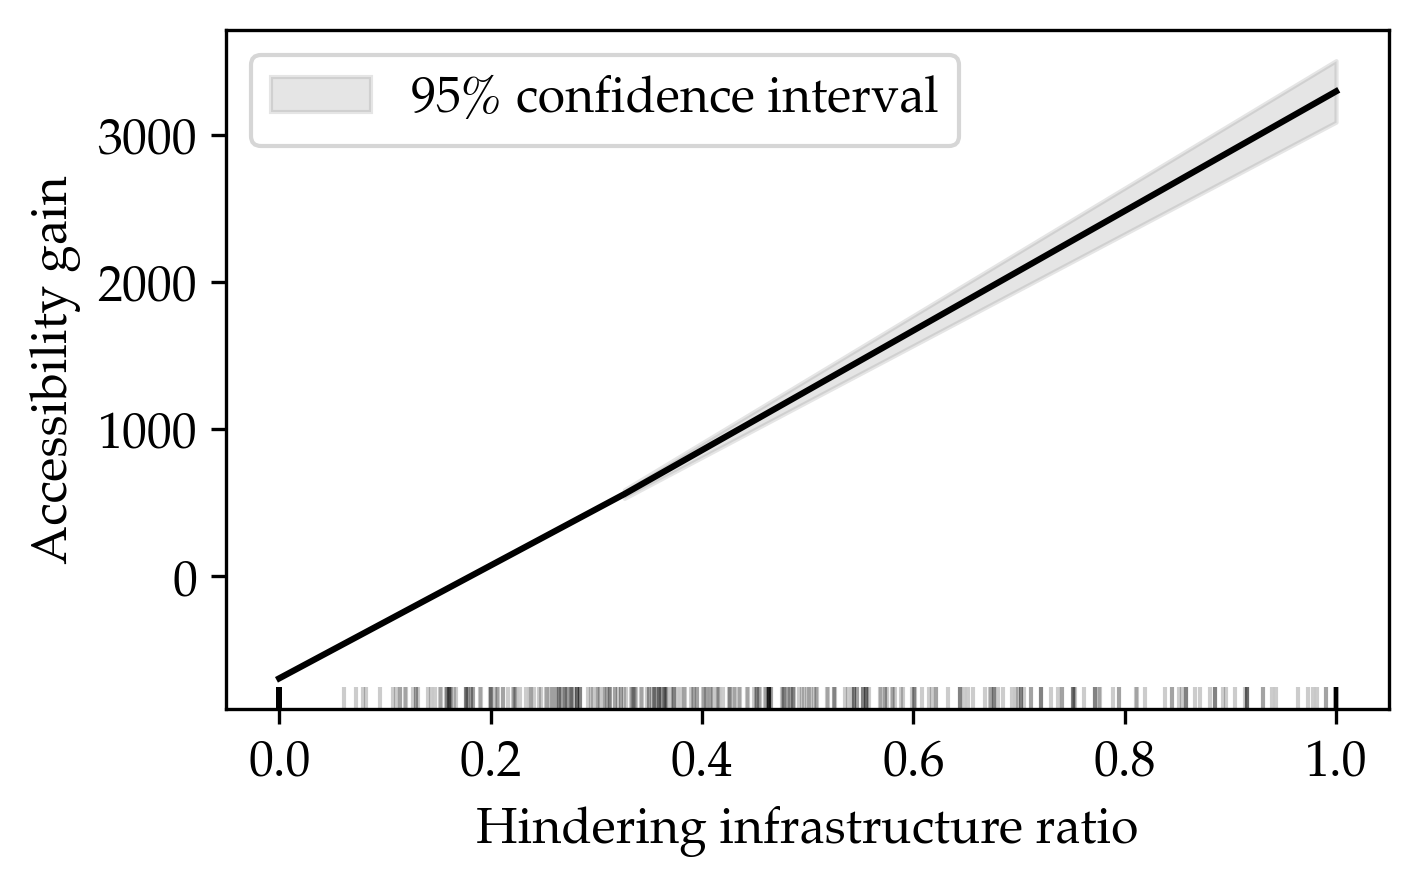

In [26]:
fig, ax = plt.subplots(figsize=(5,3),dpi=300)
ale_eff = ale(
    X=X_sample, model=model, feature=["Hindering infrastructure ratio"], grid_size=30, include_CI=True, C=0.95, fig=fig, ax=ax
)
ax.set_xlabel('Hindering infrastructure ratio')
ax.set_ylabel('Accessibility gain')
# Customize line color
for line in ax.get_lines():
    line.set_color('black') 
    line.set_linewidth(1.5)
# plt.legend(['95\% condfidence interval'],fontsize=12)
ax.set_title('')
plt.savefig('result_output/T_hindering.pdf', bbox_inches='tight', dpi=300)

plt.show()



PyALE._ALE_generic:INFO: Continuous feature detected.


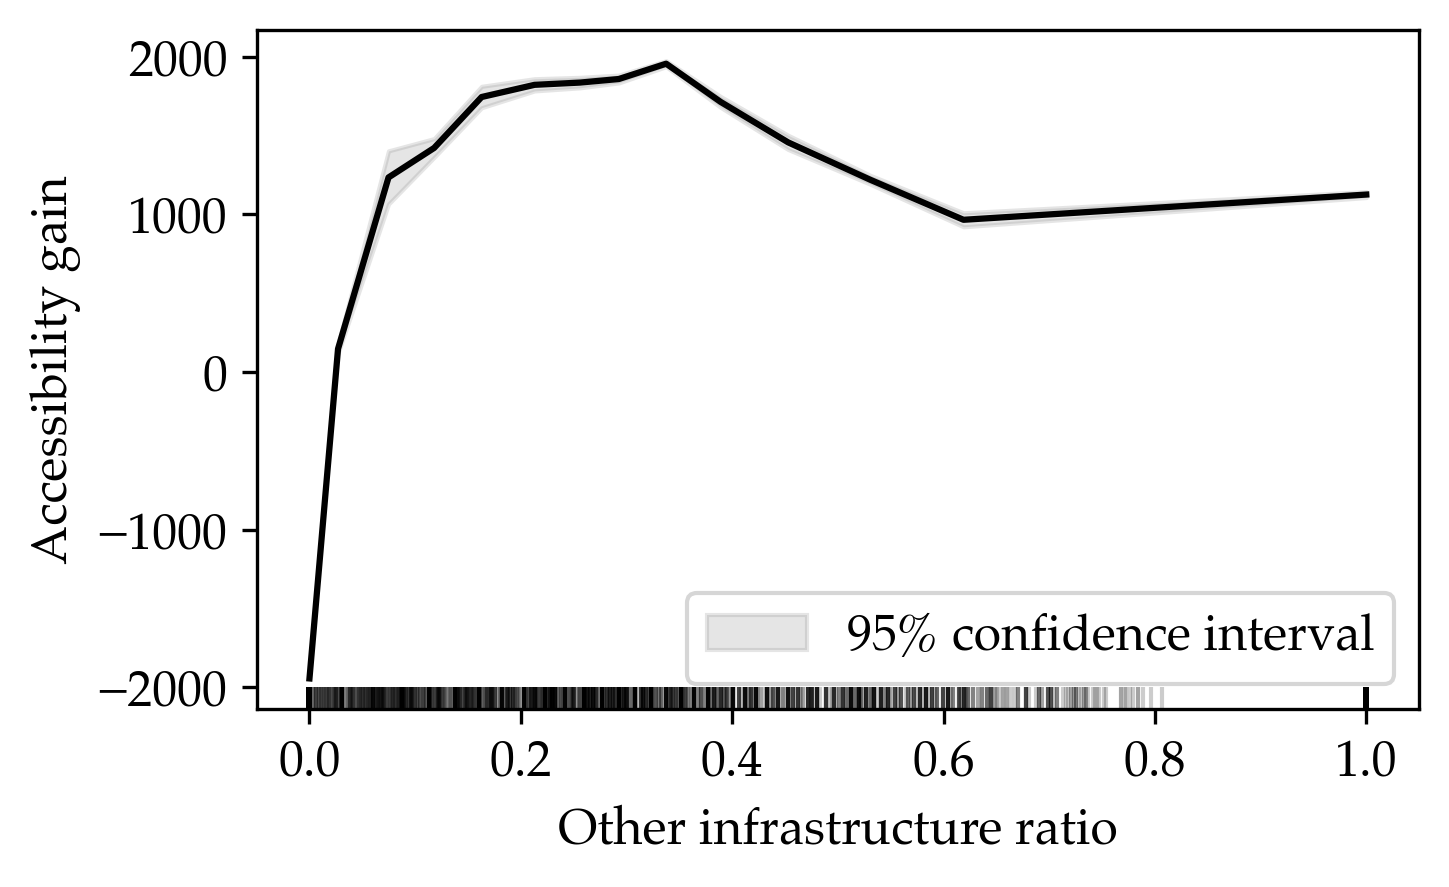

In [27]:
fig, ax = plt.subplots(figsize=(5,3),dpi=300)
ale_eff = ale(
    X=X_sample, model=model, feature=["Other infrastructure ratio"], grid_size=60, include_CI=True, C=0.95, fig=fig, ax=ax
)
ax.set_xlabel('Other infrastructure ratio')
ax.set_ylabel('Accessibility gain')
# Customize line color
for line in ax.get_lines():
    line.set_color('black') 
    line.set_linewidth(1.5)
# plt.legend(['95\% condfidence interval'],fontsize=12)
ax.set_title('')
plt.savefig('result_output/T_other.pdf', bbox_inches='tight', dpi=300)

plt.show()


# SHAP

In [28]:
import shap

explainer = shap.Explainer(model_xgb)
shap_values = explainer(X)

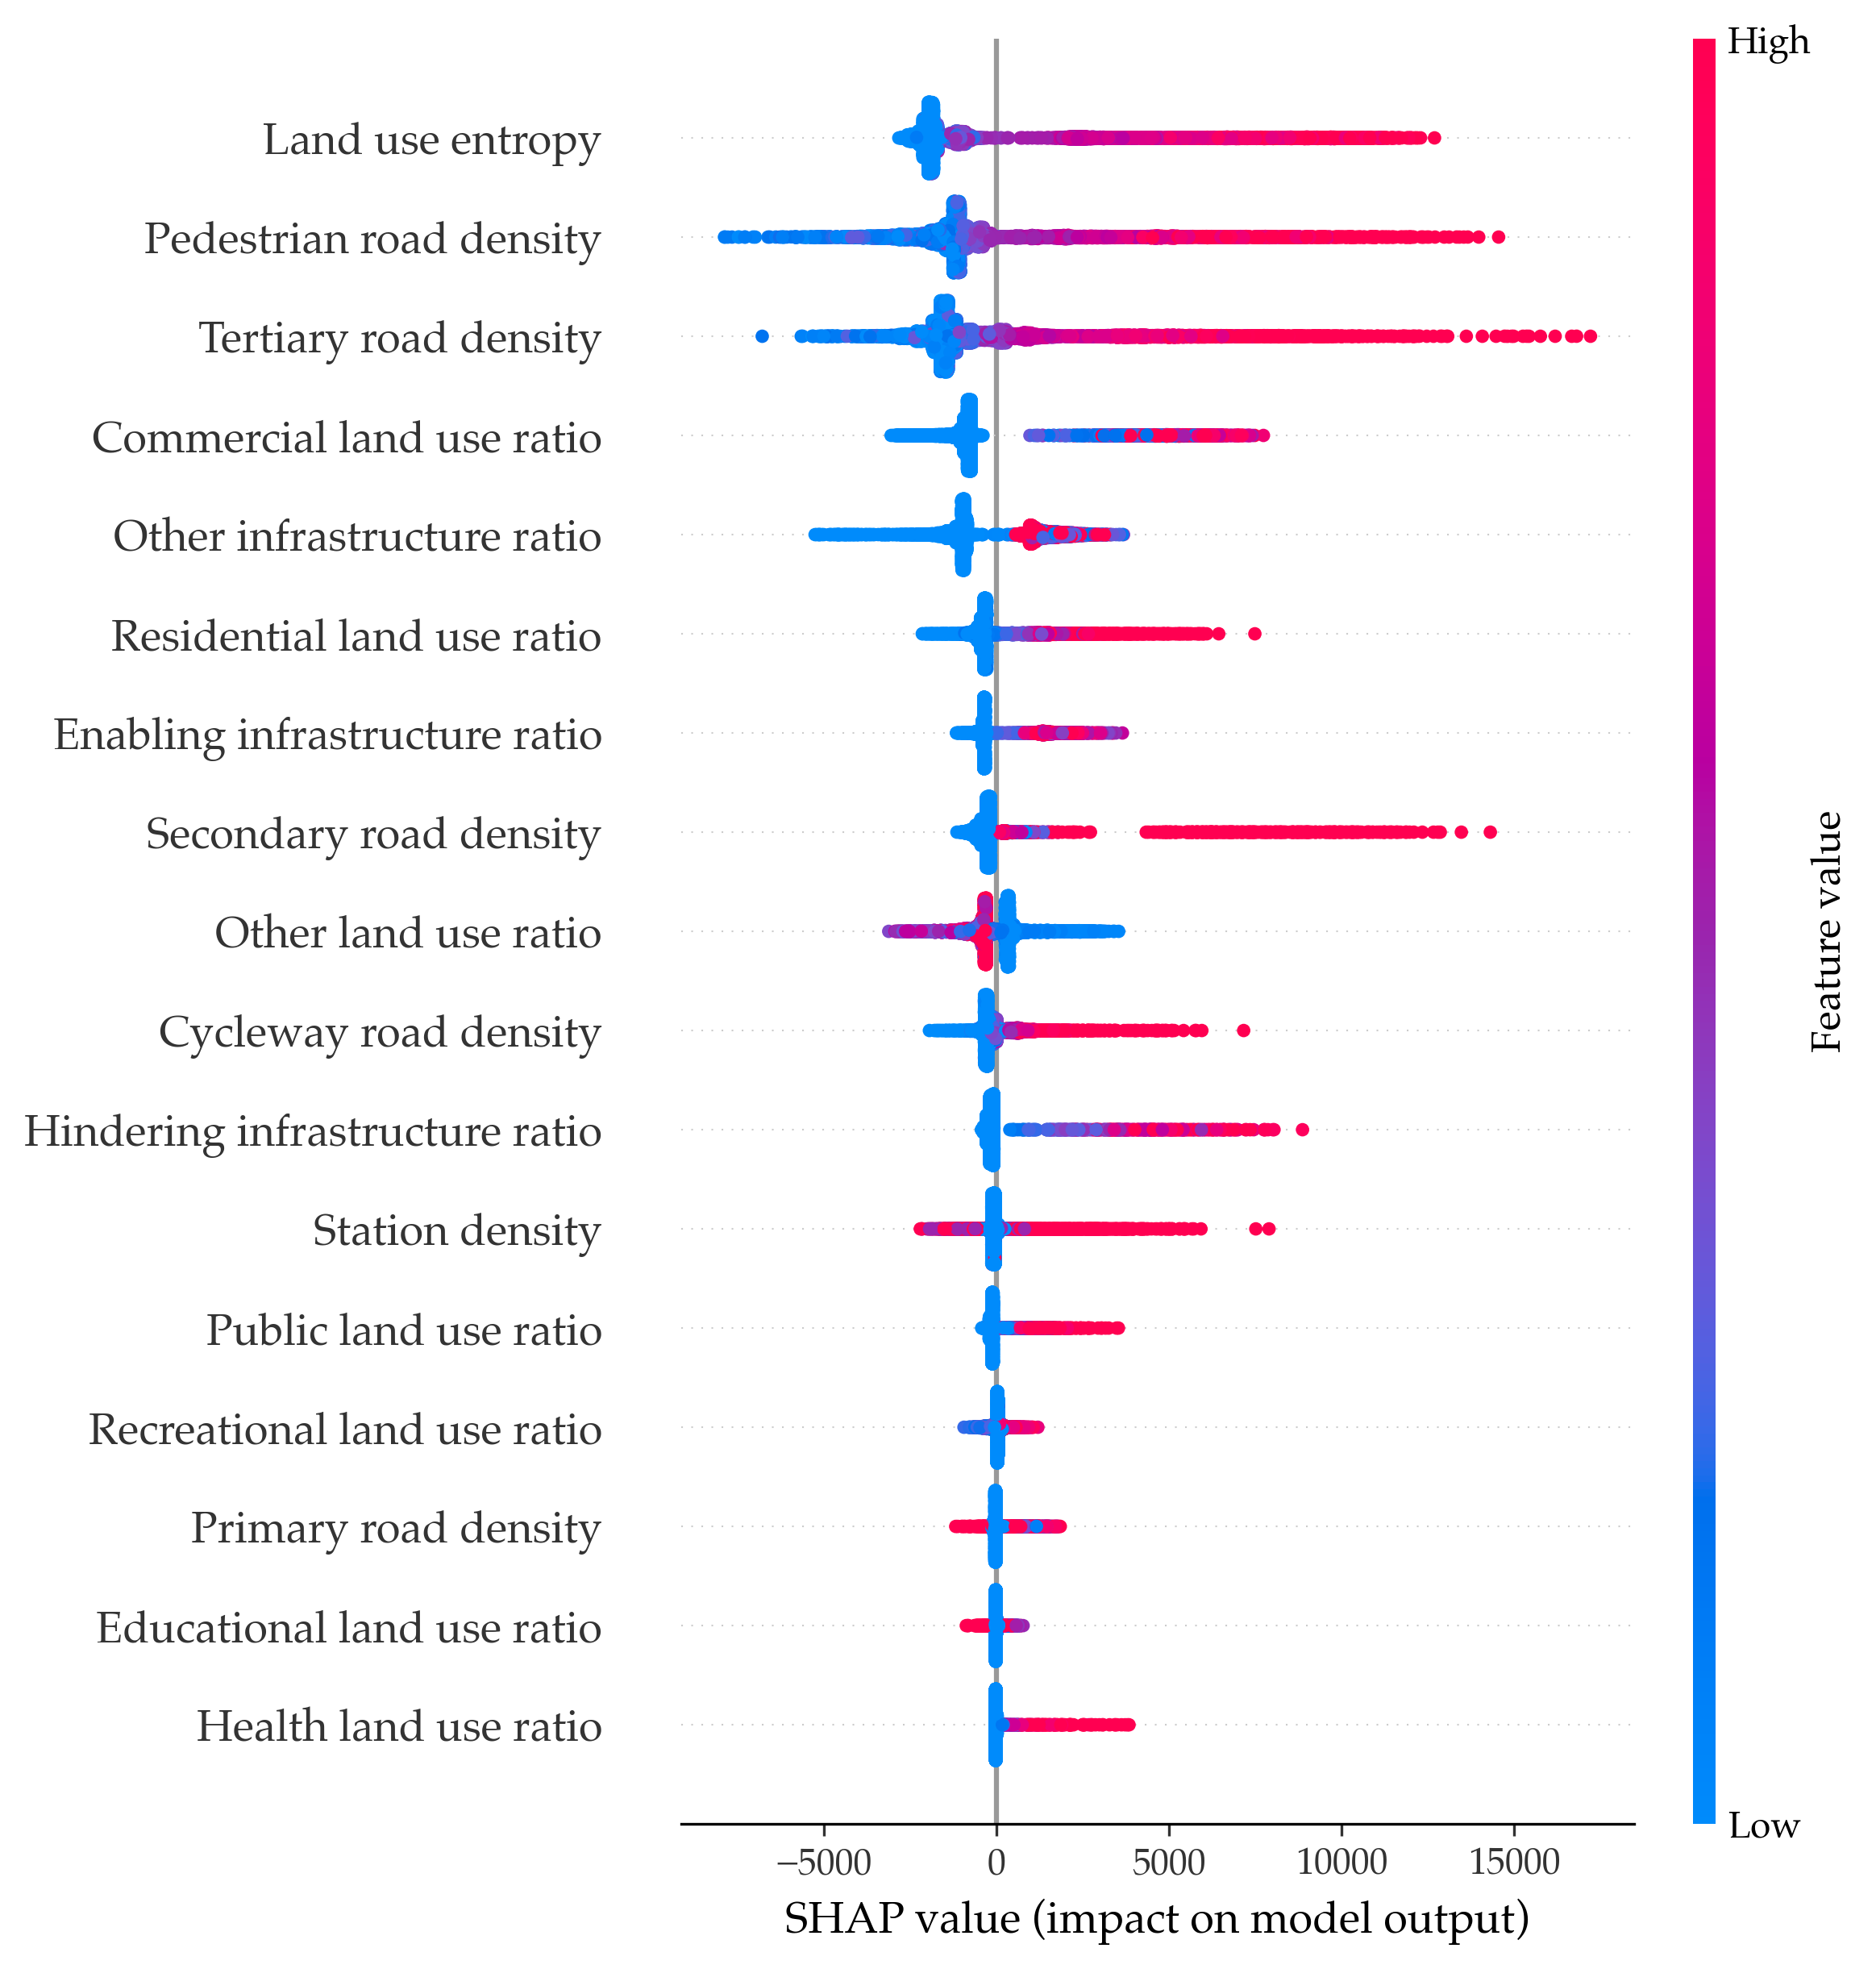

In [34]:
plt.figure(figsize=(4,3), dpi=300)
shap.summary_plot(shap_values, show=False)

plt.savefig('result_output/shap_summary.pdf', bbox_inches='tight', dpi=300)
plt.show()

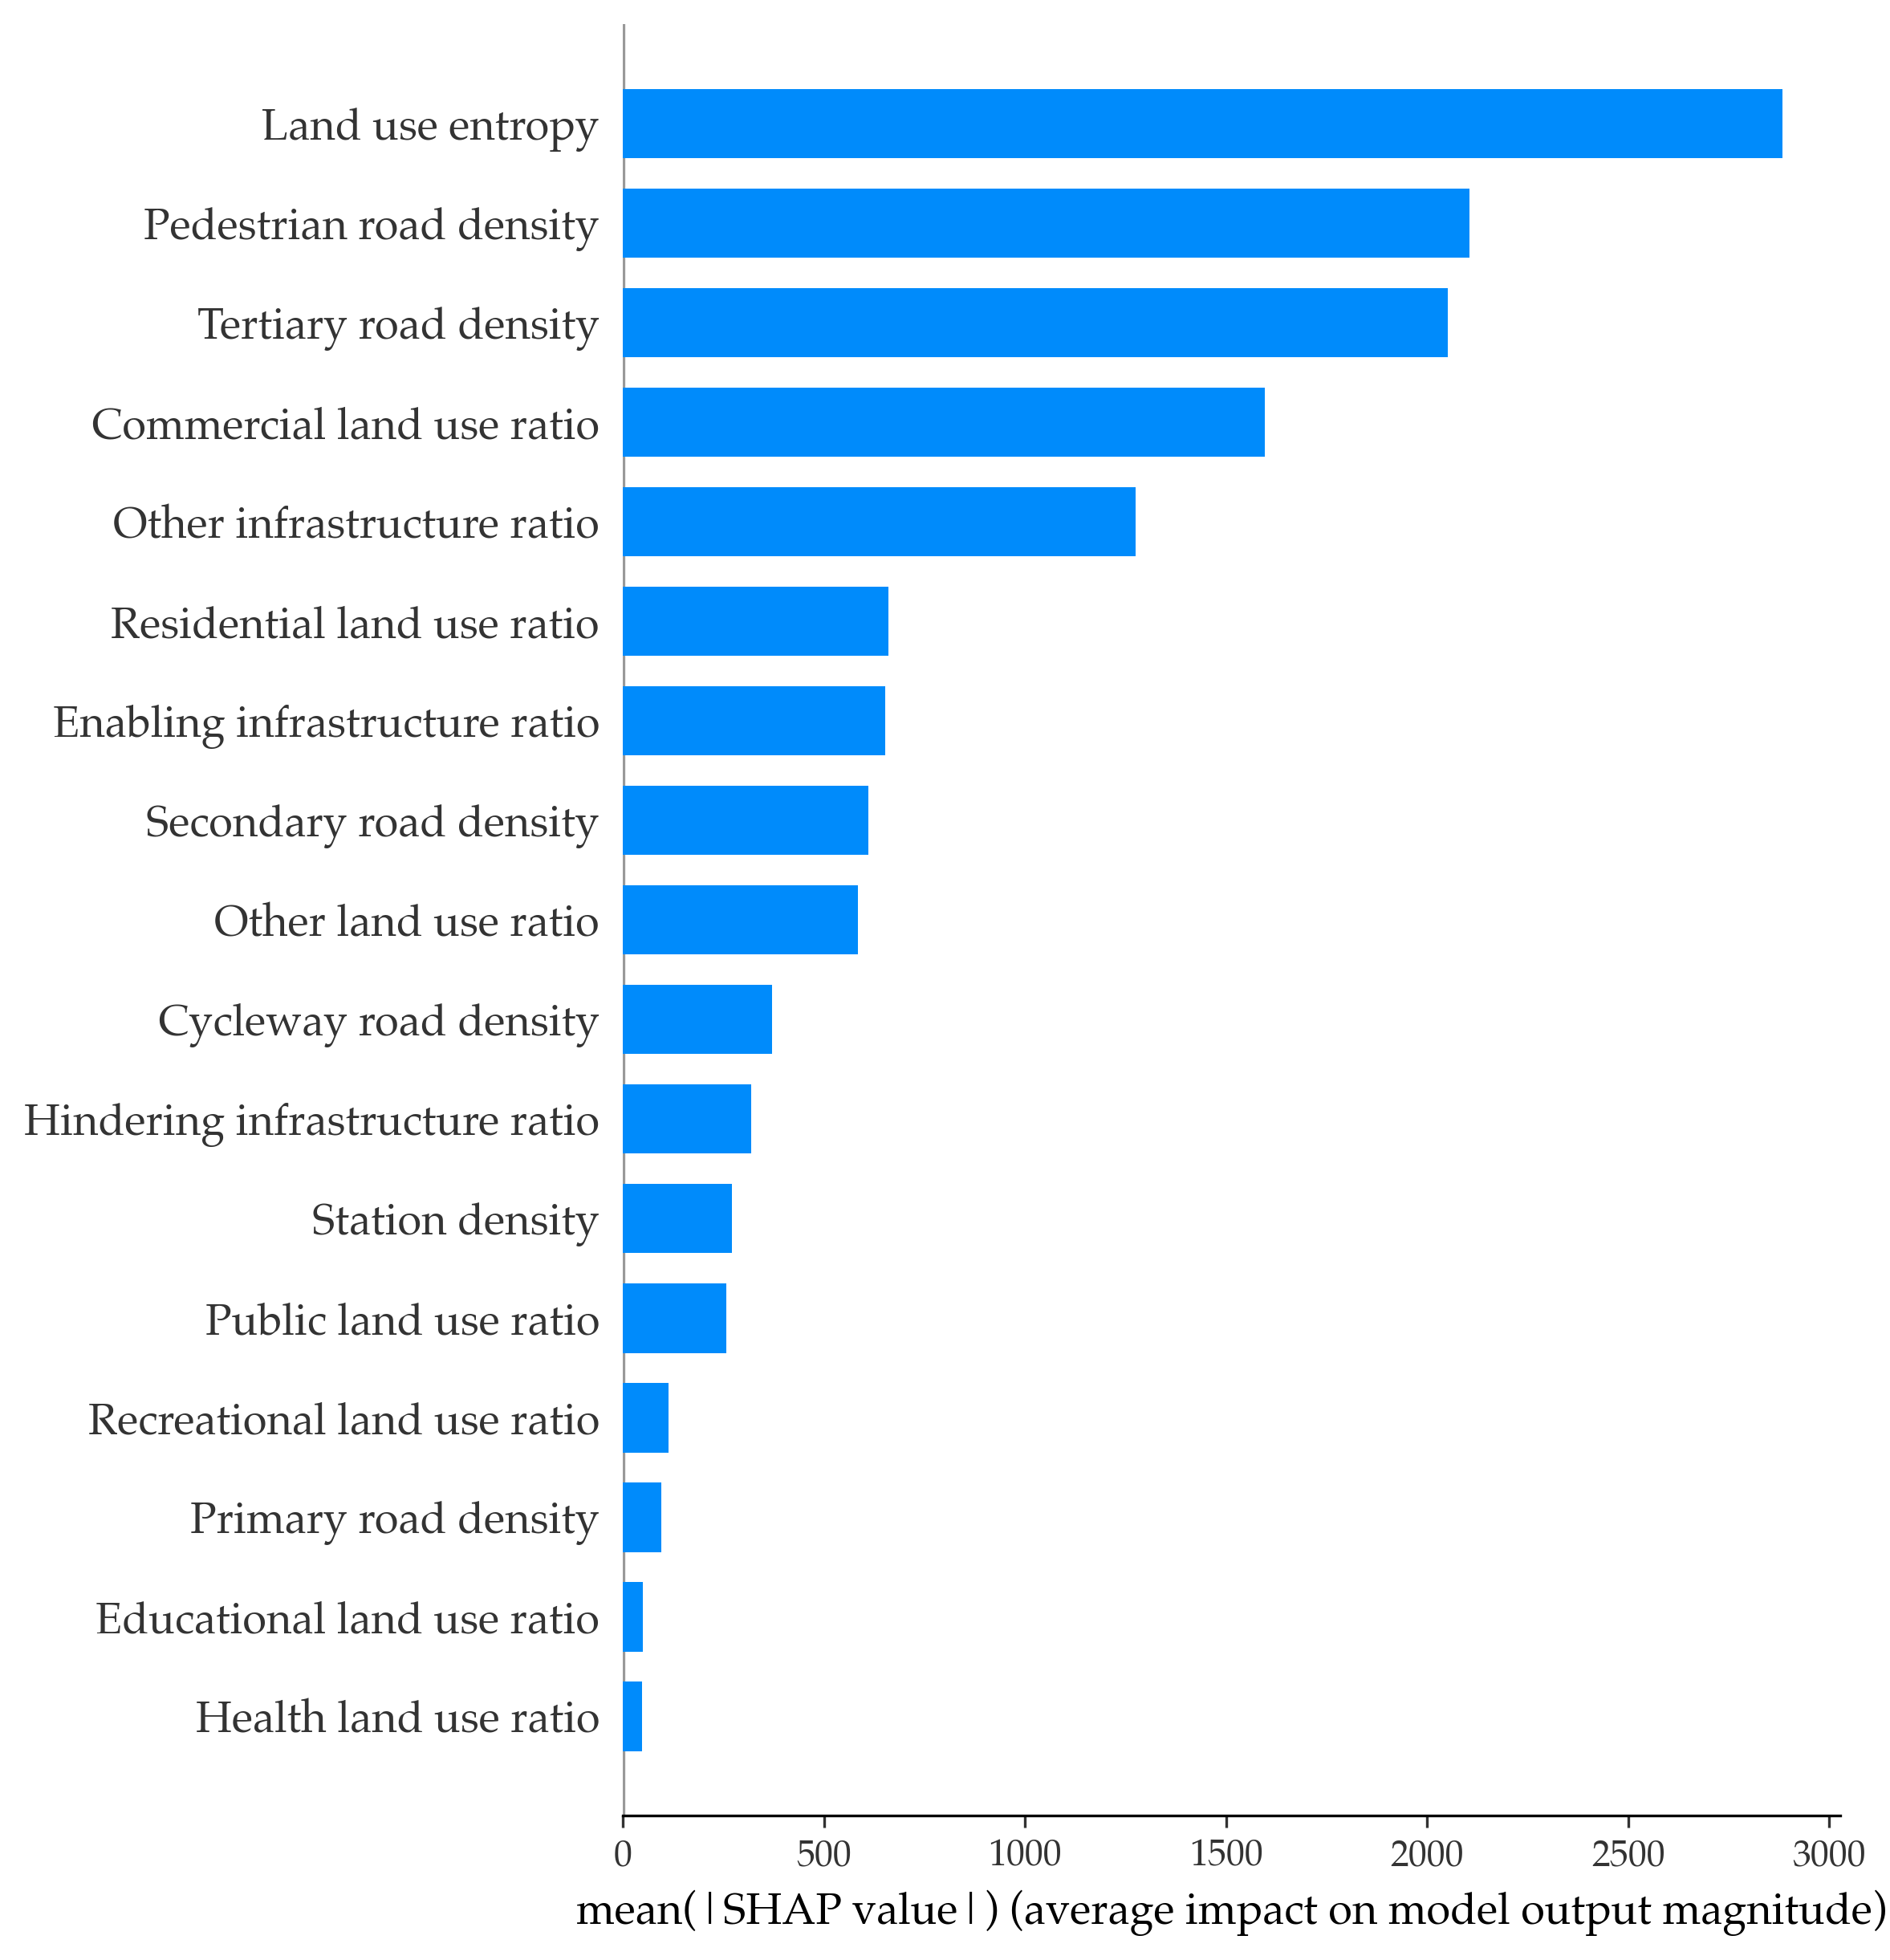

In [36]:
plt.figure(dpi=300)
shap.summary_plot(shap_values, X[features], plot_type="bar",show=False)

plt.savefig('result_output/shap_importance.pdf', bbox_inches='tight', dpi=300)
plt.show()

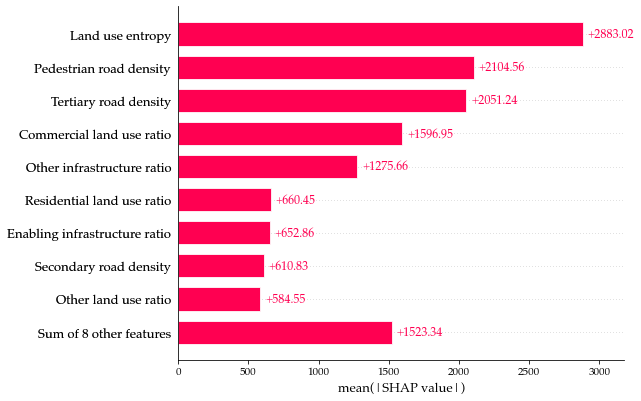

In [124]:
shap.plots.bar(shap_values)

## Road density

<Figure size 1800x1200 with 0 Axes>

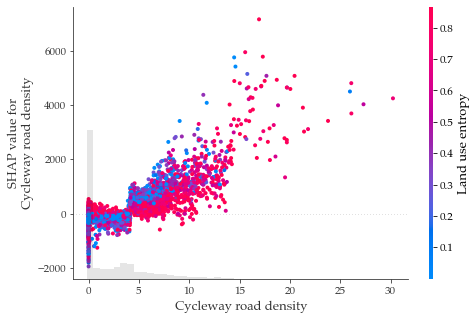

In [39]:
plt.figure(dpi=300)
shap.plots.scatter(shap_values[:, "Cycleway road density"], color=shap_values[:, "Land use entropy"], show=False)

plt.savefig('result_output/scatter_cycleway.pdf', bbox_inches='tight', dpi=300)
plt.show()



<Figure size 1800x1200 with 0 Axes>

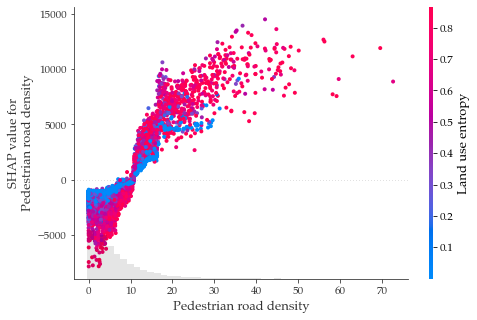

In [40]:
plt.figure(dpi=300)
shap.plots.scatter(shap_values[:, "Pedestrian road density"], color=shap_values[:, "Land use entropy"], show=False)

plt.savefig('result_output/scatter_pedestrian.pdf', bbox_inches='tight', dpi=300)
plt.show()



<Figure size 1800x1200 with 0 Axes>

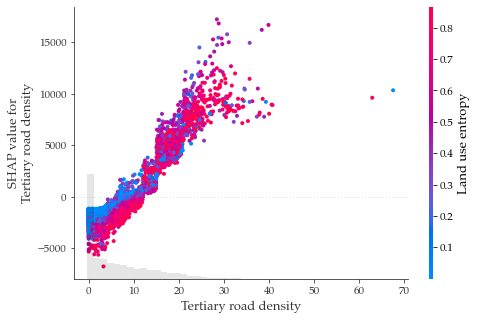

In [41]:
plt.figure(dpi=300)
shap.plots.scatter(shap_values[:, "Tertiary road density"], color=shap_values[:, "Land use entropy"], show=False)

plt.savefig('result_output/scatter_tertiary.pdf', bbox_inches='tight', dpi=300)
plt.show()



<Figure size 1800x1200 with 0 Axes>

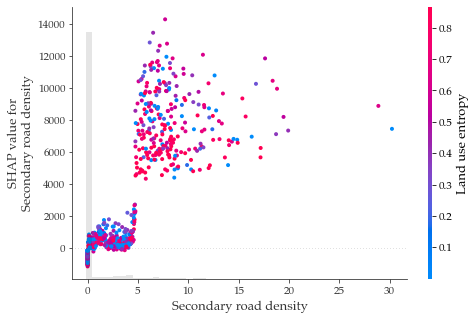

In [42]:
plt.figure(dpi=300)
shap.plots.scatter(shap_values[:, "Secondary road density"], color=shap_values[:, "Land use entropy"], show=False)

plt.savefig('result_output/scatter_secondary.pdf', bbox_inches='tight', dpi=300)
plt.show()



## Transport infrastructure

<Figure size 1800x1200 with 0 Axes>

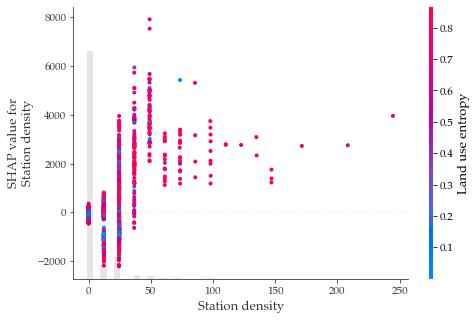

In [44]:
plt.figure(dpi=300)
shap.plots.scatter(shap_values[:, "Station density"], color=shap_values[:, "Land use entropy"], show=False)

plt.savefig('result_output/scatter_station.pdf', bbox_inches='tight', dpi=300)
plt.show()



<Figure size 1800x1200 with 0 Axes>

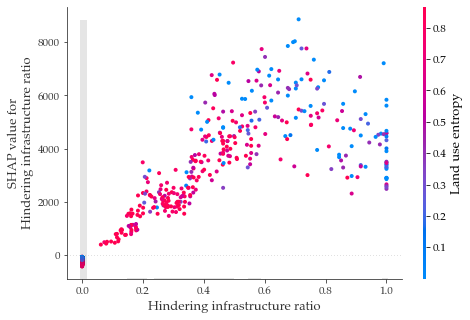

In [45]:
plt.figure(dpi=300)
shap.plots.scatter(shap_values[:, "Hindering infrastructure ratio"], color=shap_values[:, "Land use entropy"], show=False)

plt.savefig('result_output/scatter_hindering.pdf', bbox_inches='tight', dpi=300)
plt.show()



<Figure size 1800x1200 with 0 Axes>

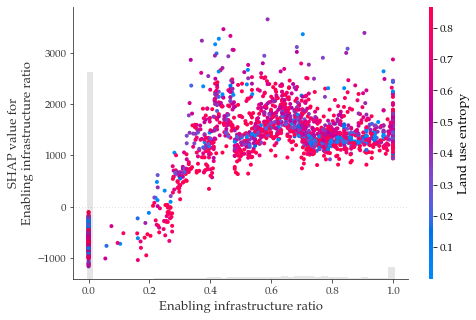

In [46]:
plt.figure(dpi=300)
shap.plots.scatter(shap_values[:, "Enabling infrastructure ratio"], color=shap_values[:, "Land use entropy"], show=False)

plt.savefig('result_output/scatter_enabling.pdf', bbox_inches='tight', dpi=300)
plt.show()



<Figure size 1800x1200 with 0 Axes>

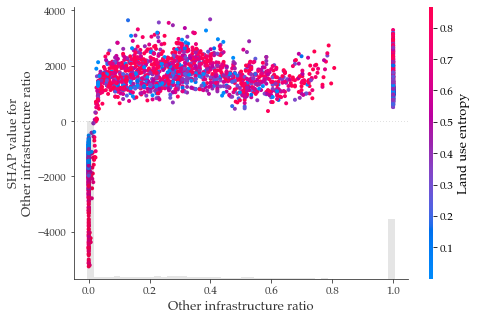

In [47]:
plt.figure(dpi=300)
shap.plots.scatter(shap_values[:, "Other infrastructure ratio"], color=shap_values[:, "Land use entropy"], show=False)

plt.savefig('result_output/scatter_other_infra.pdf', bbox_inches='tight', dpi=300)
plt.show()



## Land use

<Figure size 1800x1200 with 0 Axes>

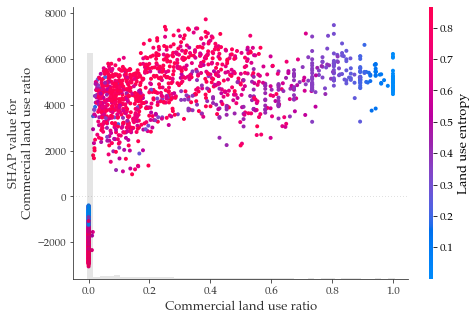

In [48]:
plt.figure(dpi=300)
shap.plots.scatter(shap_values[:, "Commercial land use ratio"], color=shap_values[:, "Land use entropy"], show=False)

plt.savefig('result_output/scatter_commercial.pdf', bbox_inches='tight', dpi=300)
plt.show()



<Figure size 1800x1200 with 0 Axes>

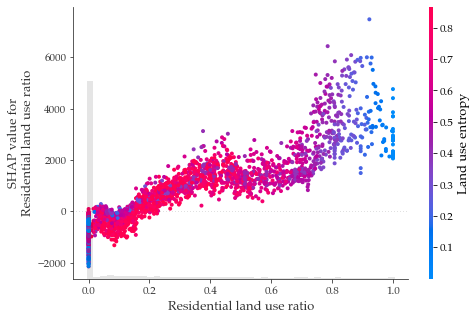

In [49]:
plt.figure(dpi=300)
shap.plots.scatter(shap_values[:, "Residential land use ratio"], color=shap_values[:, "Land use entropy"], show=False)

plt.savefig('result_output/scatter_residential.pdf', bbox_inches='tight', dpi=300)
plt.show()



<Figure size 1800x1200 with 0 Axes>

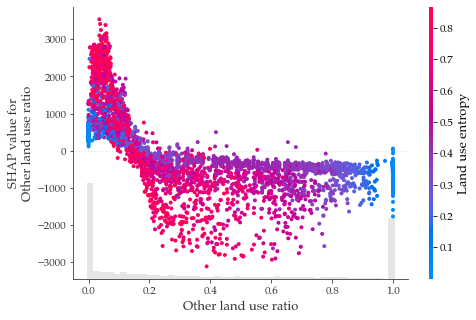

In [50]:
plt.figure(dpi=300)
shap.plots.scatter(shap_values[:, "Other land use ratio"], color=shap_values[:, "Land use entropy"], show=False)

plt.savefig('result_output/scatter_other_land.pdf', bbox_inches='tight', dpi=300)
plt.show()



<Figure size 1800x1200 with 0 Axes>

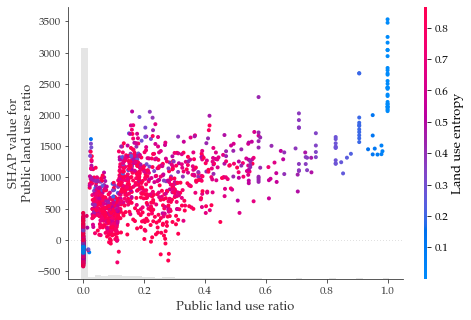

In [51]:
plt.figure(dpi=300)
shap.plots.scatter(shap_values[:, "Public land use ratio"], color=shap_values[:, "Land use entropy"], show=False)

plt.savefig('result_output/scatter_other_public.pdf', bbox_inches='tight', dpi=300)
plt.show()

